In [385]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# For getting the colour map
import matplotlib.cm as cm

#For clustering and creating dendogram
from scipy.cluster.hierarchy import dendrogram, linkage

# For labels of the dendogram plot
import pylab

# for scatter matrix of numerical variables
from pandas.plotting import scatter_matrix

#Import for running a t test
from scipy.stats import ttest_ind

#Import stats models for Logistic Regression for stastical Inference
import statsmodels.formula.api as smf

#Import DateTime to manipulate datetime columns
import datetime

# README
## This Exploratory Data Analysis Assignment is done in three sections.
### Section 1:
In this section is divided into the following subsections. We do the following for each column
#### Data Analysis 
percentiles, null values, outliers <br>
Data Distribution - histogram, bar chart. box chart.

#### Data Cleanup.
#### Data Insights
Univariate Analysis  <br>
Segmented univariate analysis <br>

t-test (To conclude after the advanced statistics course)

### Section 2:
Derived Variables.

### Section 3:
Correlation analysis, Bivariate Analysis, Logistic Regression Model



In [386]:
#Pandas is complaining about not being able to infer data types. 
#We will set the data types so that pandas is memory efficient while processing the columns. 
#reference: https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options
#todo. Set the datatypes of individual columns


# ----------------- Common Functions ------------------------

In [387]:
# Helper functions to do analysis of numeric variable.
def do_analysis(dataframe, column_name):
    print(dataframe[column_name].describe(percentiles=np.linspace(0,1,11)))
    print("Number of null values for the column {0} : {1}".format(column_name, dataframe[column_name].isnull().sum()))
    plt.figure(figsize=(10,10))
    plt.subplot(311)
    dataframe[column_name].plot(kind='hist', bins=50)
    plt.subplot(312)
    dataframe[column_name].plot(kind='box')
    dataframe[[column_name, 'loan_status']].boxplot(by='loan_status')


In [532]:
# Helper function to print the analysis of categorical variables
def do_analysis_categorical(dataframe, column_name):
    print(dataframe[column_name].value_counts())
    # Segmented Univariate Analysis
    pivot = pd.pivot_table(dataframe, values = 'policy_code',
                         index = [column_name], columns = ['loan_status'], aggfunc = np.sum, margins=True)
    pivot['Paid Percentage'] = pivot['Fully Paid']/pivot['All']
    pivot['Charged Off Percentage'] = 1 - pivot['Paid Percentage']
    pivot['Charged Off Percentage'] = pivot['Charged Off Percentage'] * 100
    pivot['Paid Percentage'] = pivot['Paid Percentage'] * 100
    print(pivot)
    pd.pivot_table(dataframe, values = 'policy_code', index = [column_name],
               columns = ['loan_status'], aggfunc = np.sum).plot(kind='bar', stacked=True, figsize=(24, 8))

In [389]:
# Helper function to run a t test between charged_off and fully paid population.
def run_t_test(dataframe, column_name):
    charged_off = dataframe.loc[dataframe['loan_status'] == 'Charged Off']
    fully_paid = dataframe.loc[dataframe['loan_status'] == 'Fully Paid']
    print(ttest_ind(charged_off[column_name], fully_paid[column_name]))
    

In [390]:
#All input dates are in MON-YY Format e.g: DEC-11
def changeDate2SequenceOfInt(inputDate):
    if(pd.isnull(inputDate)):
        return 0
    else:
        dt = datetime.datetime.strptime(inputDate,"%b-%y")
        return int(str(dt.year) + str(dt.strftime('%m')))

In [391]:
def checkNullPerForColumns(columnName):
    print ("Null Percentage of the Column is: ==> ", round(100*(lending_club_master.loc[:,columnName].isnull().sum()/len(lending_club_master.loc[:,columnName].index)), 2))

In [392]:
#Plot CountPlot and TotalAmount Plot Based on LoanAmount
def pltUniVariableAnalysis(column, df):
    plt.figure(figsize=(10,10))
 
    y = 'loan_amnt'
    hue = 'loan_status'
   
    plt.subplot(2,1,1)
    p = sns.barplot(x = column, y = y, hue=hue, data = df, estimator=np.sum)
    p.set_xticklabels(p.get_xticklabels(), rotation = 90)
    #plt.title(sumTitle)
    plt.subplot(2,1,2)
    q = sns.countplot(x = column, hue = hue, data = df)
    q.set_xticklabels(q.get_xticklabels(), rotation = 90)
    #plt.title(countTitle)
    plt.show()

In [393]:
def createDict(columnName, dataFrame):
    unique_columnValues = dataFrame.loc[:,columnName].unique()
    unique_Count = len(unique_columnValues)
    columnName_col2Val = dict(zip(unique_columnValues,np.arange(unique_Count)))
    columnName_val2Col = dict(zip(np.arange(unique_Count), unique_columnValues))
    return columnName_col2Val, columnName_val2Col

In [394]:
#Plot Categorical Based on Loan_Amount With Title as Parameter. Draw 2 Plots to Show the Comparision of Loan Status
def pltCategorical(columnName, title1, title2):
    X1 = lending_club.pivot_table(index=columnName, values = 'loan_amnt', columns='loan_status', aggfunc='sum').reset_index()
    plt.figure(figsize=(16,14))
    plt.subplot(2, 1, 1)
    p = sns.barplot(columnName, 'Charged Off', data = X1.sort_values(by = 'Charged Off', ascending = False))
    p.set_xticklabels(p.get_xticklabels(),rotation=30)
    plt.title(title1)
    plt.subplot(2,1,2)
    q = sns.barplot(columnName, 'Fully Paid', data = X1.sort_values(by = 'Fully Paid', ascending = False))
    q.set_xticklabels(q.get_xticklabels(),rotation=30)
    plt.title(title2)
    plt.show()

In [395]:
#Create a DataFrame to Group LateFeePercent Based on Loan_Status
def createDF_LateFeePrecent_Categories(categoryColumn):
    X1 = lending_club.pivot_table(index = categoryColumn, values = 'lateFeePrecent', columns=['loan_status'], aggfunc='mean').reset_index()
    X1['LateFeePercent_diff'] = (X1['Charged Off'] - X1['Fully Paid'])
    X1 = X1.sort_values(by='LateFeePercent_diff', ascending = False)
    return X1

#Plot using Dataframe output from "createDF_LateFeePrecent_Categories" function
def pltLateFeePercentOnCategies(categoryColumn, dataFrame):
    plt.figure(figsize=(15,8))
    p = sns.barplot(x = categoryColumn,y='LateFeePercent_diff', data = dataFrame.sort_values(by='LateFeePercent_diff', ascending = False))
    plt.ylabel('Charged-Off LateFee Percent On Fully Paid')
    p.set_xticklabels(p.get_xticklabels(), rotation = 90, fontsize = 12)
    plt.title("More LateFee Precent by ChargedOff Subscriber on FullyPaid Subscriber")

    plt.show() 

In [396]:
# percentile analysis
def percentileanalysis(column_name,hue):
 temp = pd.Series(data = hue)
 fig, ax = plt.subplots()
 width = 18
 fig.set_size_inches(width , 7)
 ax = sns.countplot(data = lending_club, x= column_name, order=lending_club[column_name].value_counts().index,hue = hue) 
 if len(temp.unique()) > 0:
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(lending_club))), (p.get_x()+0.05, p.get_height()+20))  
 else:
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
    del temp

# ----------------- SECTION 1 ------------------------

## Data Analysis

### ==> Read Loan.csv file

In [397]:
lending_club = pd.read_csv('loan.csv')

/Users/amirisev/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### ==> Make default datatype as string for 47th Column avoid load error

In [398]:
print("Column Name Which Failed to Load ==> ", lending_club.columns[47])
customDataType = dict(zip(lending_club.columns,lending_club.dtypes)) #Get the Datatype
customDataType['next_pymnt_d'] = 'str'
lending_club = pd.read_csv('loan.csv',dtype=customDataType) #Reload

Column Name Which Failed to Load ==>  next_pymnt_d


### ==> Find all the Columns with 100% NULL and create a Dictionary

In [399]:
#Get Null% in each Column of loan dataframe
nullColumns = pd.DataFrame(round(100*(lending_club.isnull().sum()/len(lending_club.index)), 2), columns=['null%Column'])
#Create a Map Between Columns to Null% in DataFrame
dictColumn2NullPercent = dict(zip(nullColumns.index,nullColumns['null%Column']))

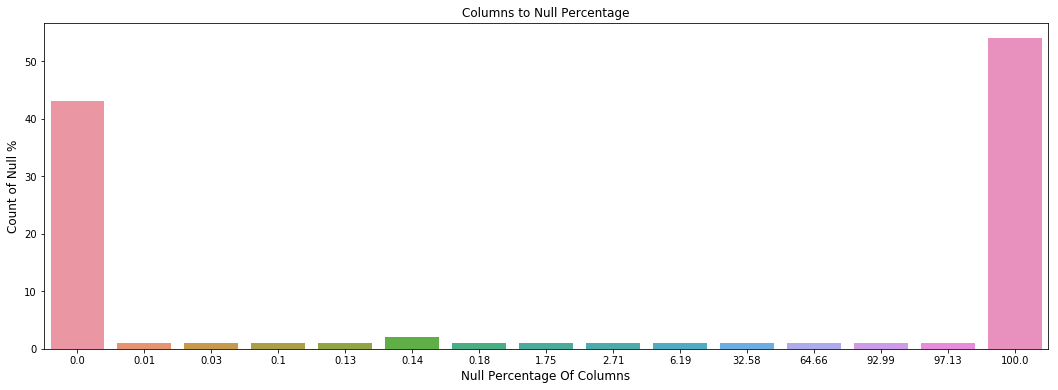

In [400]:
LendingClubCol_Df = pd.DataFrame(np.array(lending_club.columns), columns=['lending_club_columns'])
LendingClubCol_Df['NullPrecentage'] = LendingClubCol_Df['lending_club_columns'].apply(lambda x: dictColumn2NullPercent.get(x))
LendingClubCol_Df = LendingClubCol_Df.groupby('NullPrecentage').lending_club_columns.agg(['count']).sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(18,6))
p = sns.barplot(x = 'NullPrecentage', y = 'count', data = LendingClubCol_Df)
plt.xlabel('Null Percentage Of Columns', fontsize = 12)
plt.ylabel('Count of Null %', fontsize= 12)
plt.title('Columns to Null Percentage')
plt.show()

### ==> Remove all the columns from loan df having 100% Null values

In [401]:
#np Vectorized Function to Filter Null Columns from the Loan Dataframe
Func_filterNullCol = np.vectorize(lambda x: True if dictColumn2NullPercent.get(x) < 100 else False)
Func_filterNullCol(np.array(lending_club.columns))
#Drop All the Null COlumns
lending_club = lending_club.loc[:,Func_filterNullCol(np.array(lending_club.columns))]
lending_club.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### ==> Drop Columns with Single Unique Value as per Metadata Analysis

In [402]:
unncessaryColumns = ['desc', 'title', 'initial_list_status','application_type',
                     'acc_now_delinq', 'delinq_amnt', 'pymnt_plan', 'url', 'emp_title']
lending_club.drop(columns=unncessaryColumns, inplace=True)

## Basic Data Cleanup for All Columns

### ```==> loan_amnt, funded_amnt, funded_amnt_inv ```

In [403]:
#lending_club['loan_amnt'] = lending_club['loan_amnt'].apply(pd.to_numeric)
#lending_club['funded_amnt'] = lending_club['funded_amnt'].apply(pd.to_numeric)
#lending_club['funded_amnt_inv'] = lending_club['funded_amnt_inv'].apply(pd.to_numeric)
#lending_club['annual_inc'] = lending_club['annual_inc'].apply(pd.to_numeric)

### ```==> int_rate ```

In [404]:
lending_club['int_rate'] = round(lending_club['int_rate'].apply(lambda x: (str(x).split("%")[0])).apply(pd.to_numeric),0)

### ```==> installment ```

In [405]:
lending_club['installment'] = round(lending_club['installment'].apply(pd.to_numeric),0)

### ```==> emp_length ```

In [406]:
#Remove > and < Symbol and < 1 Value set to 0
#lending_club['emp_length'] = lending_club['emp_length'].apply(lambda x: str(x).split("year")[0].\
                                                    #strip().split("+")[0]).apply(lambda x: 0 if str(x).find("<") >=0 else x)


### ```==> home_ownership ```

In [407]:
# Only 3 Records in NONE Category with Full Paid, Hence same record is discarded
lending_club = lending_club[lending_club['home_ownership']  != 'NONE']

### ```==> issue_d, earliest_cr_line ```

In [408]:
#lending_club['issue_d'] = lending_club['issue_d'].apply(changeDate2SequenceOfInt)
#lending_club['earliest_cr_line'] = lending_club['earliest_cr_line'].apply(changeDate2SequenceOfInt)

### ```==> zip_code ```

In [409]:
lending_club['zip_code'] = lending_club['zip_code'].apply(lambda x: str(x)[0:3])

### ```==> revol_util ```    ```***``` NAN Value Normalization Need to Check

In [410]:
#Setting the default value 100%, Need to check futher 
lending_club.loc[(pd.isna(lending_club['revol_util'])), 'revol_util'] = 100.0
lending_club['revol_util'] = round(lending_club['revol_util'].apply(lambda x: (str(x).split("%")[0])).apply(pd.to_numeric),0)

### ```==> next_pymnt_d, last_pymnt_d, last_credit_pull_d ```

In [411]:
lending_club['next_pymnt_d'] = lending_club['next_pymnt_d'].apply(changeDate2SequenceOfInt)
#lending_club['last_pymnt_d'] = lending_club['last_pymnt_d'].apply(changeDate2SequenceOfInt)
lending_club['last_credit_pull_d'] = lending_club['last_credit_pull_d'].apply(changeDate2SequenceOfInt)

==> Data Cleanup loan_status <br>
Since the Current loan statuses cannot be used to determine whether a loan is paid or charged off, <br>
We will remove the loan_status with the value Current. We will save it in a separate dataframe for future analysis

In [412]:
lending_club_master = lending_club
lending_club_current = lending_club.loc[lending_club['loan_status'] == 'Current']
lending_club = lending_club.loc[lending_club['loan_status'] != 'Current']
lending_club_ChargedOff = lending_club.loc[lending_club['loan_status'] == 'Charged Off']

# Data Analysis for loan_amnt

count    38574.000000
mean     11047.449059
std       7348.517888
min        500.000000
0%         500.000000
10%       3100.000000
20%       5000.000000
30.0%     6000.000000
40%       7750.000000
50%       9600.000000
60.0%    11200.000000
70%      14000.000000
80%      16000.000000
90%      21600.000000
100%     35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
Number of null values for the column loan_amnt : 0


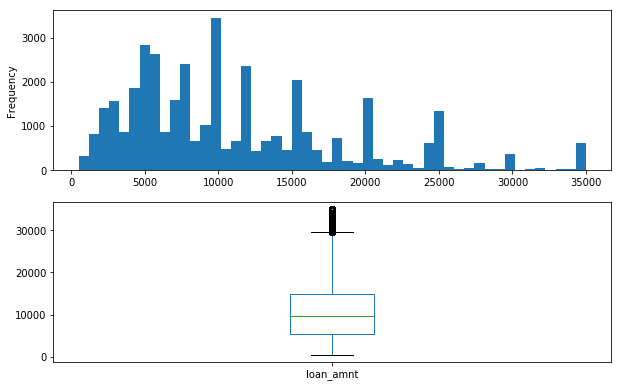

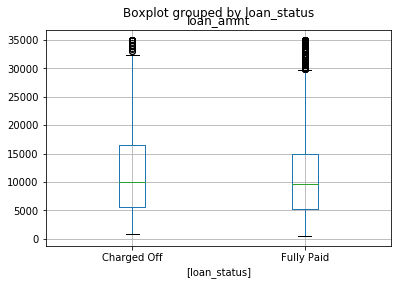

In [413]:
do_analysis(lending_club, 'loan_amnt')

## Insight.
The loan amount has spikes at the round numbers like 5, 000$, 10,000 $, 15, 000$, 20, 000$ 25, 000 $ etc. <br/>
This can be an input to the UX team or the Business Development team to create loan packages at these round numbers.

In [414]:
run_t_test(lending_club, 'loan_amnt')

Ttest_indResult(statistic=11.694718423883753, pvalue=1.533449120688028e-31)


## Insight.
Visually, there seems to be a slightdifference in the means of the loan amount for charged off and fully paid. <br/>
However, T Test indicates that loan amount has a bearing on the loan defaults

# Data Cleanup for loan_amnt

## Data Cleanup:  We will not remove any row for loan_amnt as all the rows seem valid.

# Insights for loan_amnt

In [415]:
lending_club[['annual_inc', 'loan_amnt']].corr()

,annual_inc,loan_amnt
annual_inc,1.000000,0.269045
loan_amnt,0.269045,1.000000


## Insight 
The Loan amount is corelated positively with the annual income

# Data Analysis for funded_amnt

In [416]:
# Is funded_amnt same as loan amnt. 
#What % of rows where funded amount and loan amount are not same.
percent_difference = lending_club.loc[lending_club['loan_amnt'] != lending_club['funded_amnt']]['funded_amnt'].shape[0]/ lending_club.shape[0]
print("% .2f" % (percent_difference * 100))

 4.55


In [417]:
# Is the monetary difference more. yes
(lending_club['loan_amnt'] - lending_club['funded_amnt']).sum()

10144475

count    38574.000000
mean     10784.461684
std       7090.379936
min        500.000000
0%         500.000000
10%       3000.000000
20%       5000.000000
30.0%     6000.000000
40%       7500.000000
50%       9550.000000
60.0%    10875.000000
70%      13000.000000
80%      16000.000000
90%      20000.000000
100%     35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
Number of null values for the column funded_amnt : 0


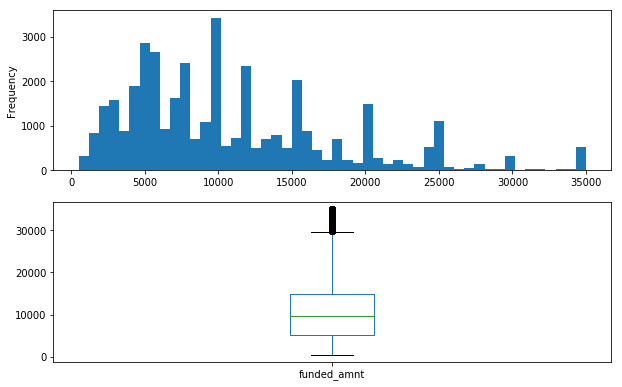

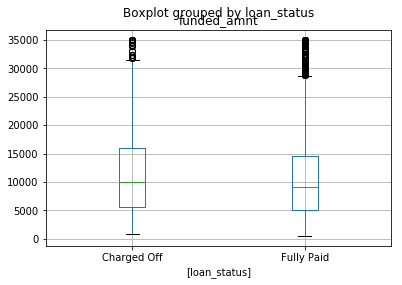

In [418]:
do_analysis(lending_club, 'funded_amnt')

# Insight
Charged off has a higher average funded amount than the fully paid segment <br>
Also, since the loan_amount and funded_amount are highly corelated, and there is not a lot a difference, we can just use the funded_amount column and drop the loan amount column.

# Data Cleanup for funded_amnt

# Insights for funded_amnt

In [419]:
# corelation between loan amount and funded amount
lending_club[['loan_amnt', 'funded_amnt']].corr()

,loan_amnt,funded_amnt
loan_amnt,1.000000,0.981789
funded_amnt,0.981789,1.000000


# Data Analysis for funded_amnt_inv

count    38574.000000
mean     10223.152285
std       7022.580869
min          0.000000
0%           0.000000
10%       2827.665000
20%       4375.162000
30.0%     5600.000000
40%       7000.000000
50%       8736.649151
60.0%    10000.000000
70%      12150.000000
80%      15000.000000
90%      19975.000000
100%     35000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64
Number of null values for the column funded_amnt_inv : 0


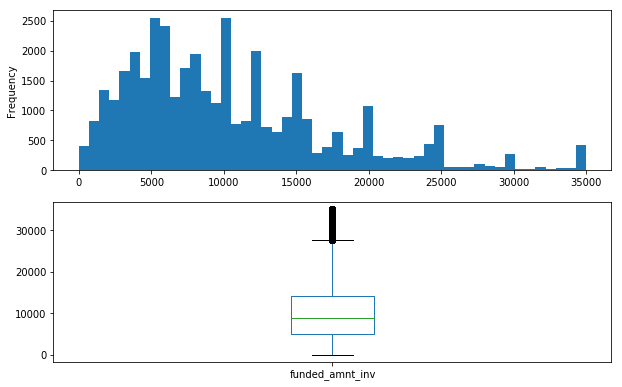

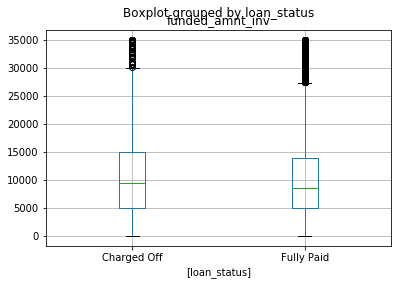

In [420]:
do_analysis(lending_club, 'funded_amnt_inv')

# Data Cleanup for funded_amnt_inv

# Insights for funded_amnt_inv

# Data Analysis for term

In [421]:
lending_club['term'].value_counts()

 36 months    29093
 60 months     9481
Name: term, dtype: int64

 36 months    29093
 60 months     9481
Name: term, dtype: int64
loan_status  Charged Off  Fully Paid    All
term                                       
 36 months          3227       25866  29093
 60 months          2400        7081   9481
All                 5627       32947  38574


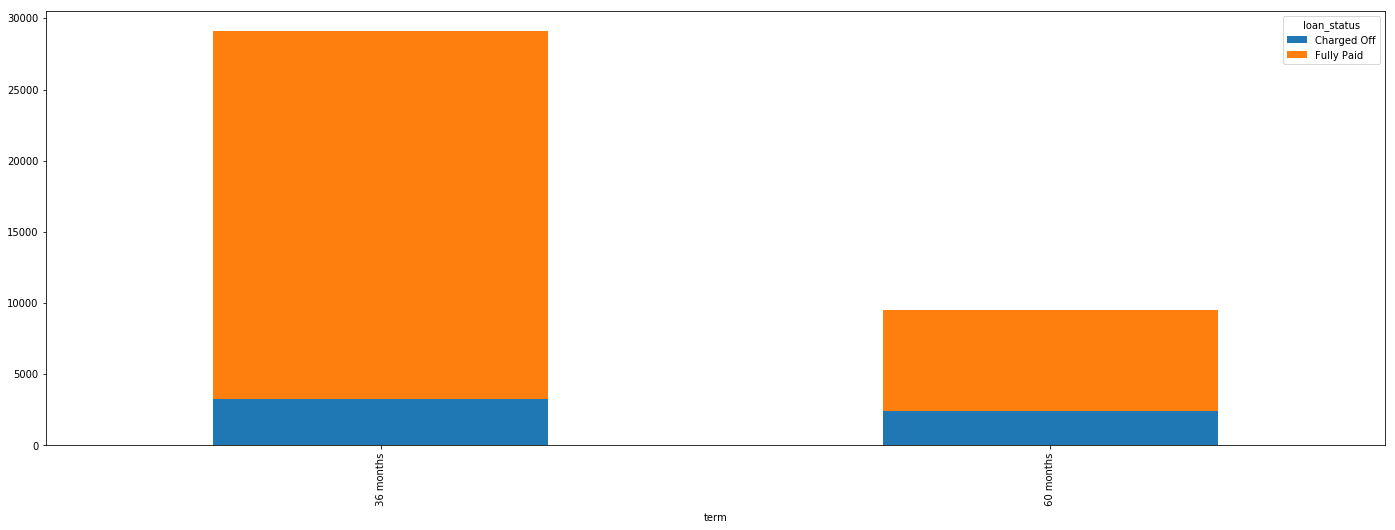

In [422]:
do_analysis_categorical(lending_club, 'term')

## Insight : term
11% of customers with tenure of 36 months default <br>
25.42 % of the customers with tenure of 60 months default <br>
Higher tenure leads to higher default rates.

# Data Cleanup for term

# Insights for term

# Data Analysis for int_rate

# Data Cleanup for int_rate

# Insights for int_rate

# Data Analysis for installment

In [423]:
lending_club['installment'].value_counts()
#lending_club['installment'].isnull().sum()

156.0     250
311.0     194
187.0     172
249.0     154
313.0     151
152.0     148
154.0     144
243.0     143
163.0     141
168.0     138
164.0     135
188.0     132
198.0     132
262.0     132
165.0     130
324.0     130
161.0     129
130.0     129
389.0     128
170.0     128
196.0     128
93.0      126
98.0      125
124.0     124
316.0     123
185.0     123
195.0     123
339.0     122
166.0     122
97.0      121
         ... 
1015.0      1
973.0       1
1137.0      1
1033.0      1
978.0       1
1295.0      1
1158.0      1
1250.0      1
1265.0      1
1106.0      1
946.0       1
1043.0      1
982.0       1
1128.0      1
936.0       1
938.0       1
1156.0      1
846.0       1
1303.0      1
1173.0      1
943.0       1
895.0       1
1023.0      1
954.0       1
1284.0      1
927.0       1
1088.0      1
22.0        1
920.0       1
950.0       1
Name: installment, Length: 1048, dtype: int64

count    38574.000000
mean       322.481490
std        208.637858
min         16.000000
0%          16.000000
10%         99.000000
20%        150.000000
30.0%      186.000000
40%        229.000000
50%        278.000000
60.0%      328.000000
70%        387.000000
80%        480.000000
90%        621.000000
100%      1305.000000
max       1305.000000
Name: installment, dtype: float64
Number of null values for the column installment : 0


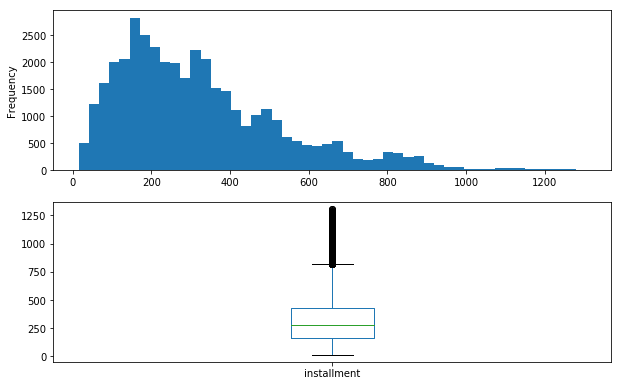

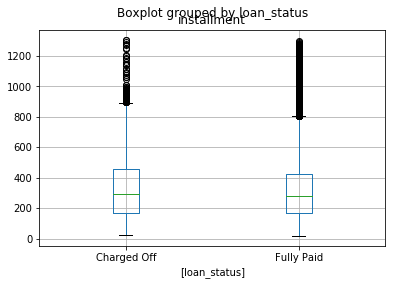

In [424]:
do_analysis(lending_club, 'installment')

In [425]:
# corelation between loan amount and funded amount
lending_club[['loan_amnt', 'installment']].corr()

,loan_amnt,installment
loan_amnt,1.000000,0.932256
installment,0.932256,1.000000


/Users/amirisev/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


200-400     14708
0-200       13112
400-600      6548
600-800      2636
800-1000     1335
1000>         235
Name: categorical_installment, dtype: int64
loan_status              Charged Off  Fully Paid    All
categorical_installment                                
0-200                           1819       11293  13112
1000>                             25         210    235
200-400                         2061       12647  14708
400-600                         1044        5504   6548
600-800                          432        2204   2636
800-1000                         246        1089   1335
All                             5627       32947  38574


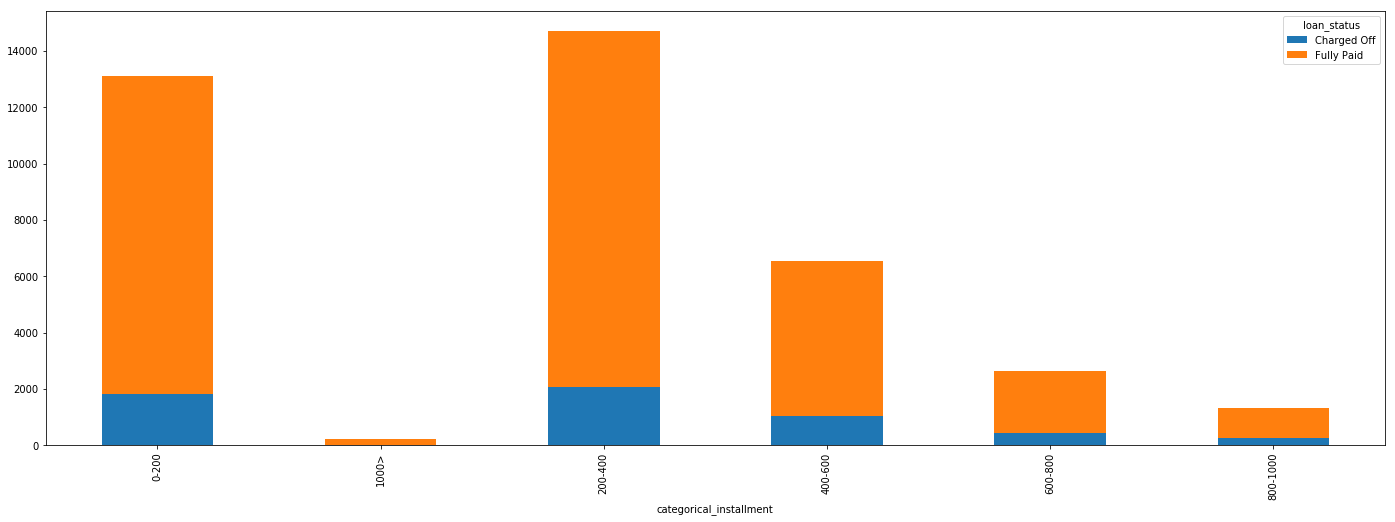

In [426]:
#categorizing the installment to bins to get better insights
def categorizefunc(x):
    if (x>0 and x<=200) :
        return '0-200' 
    elif (x>200 and x<=400):
        return '200-400' 
    elif(x>400 and x<=600): 
        return '400-600' 
    elif(x>600 and x<=800): 
        return '600-800' 
    elif(x>800 and x<=1000):
        return '800-1000'
    else:
        return '1000>'
                                                                          
lending_club['categorical_installment']=lending_club['installment'].apply(categorizefunc)
lending_club['categorical_installment']
do_analysis_categorical(lending_club, 'categorical_installment')

# Data Cleanup for installment

We will not remove any row for installment as all the rows seem valid.


# Insights for installment

correlation between installment and loan_amount is high.
more number of customers pay installment around $180.
The number of fully paid loans are with installments between 200 to 400


# Data Analysis for grade

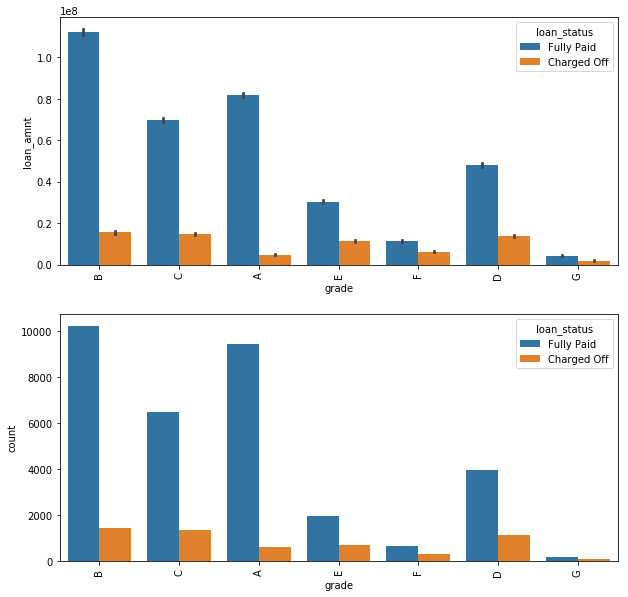

In [427]:
pltUniVariableAnalysis('grade',lending_club)

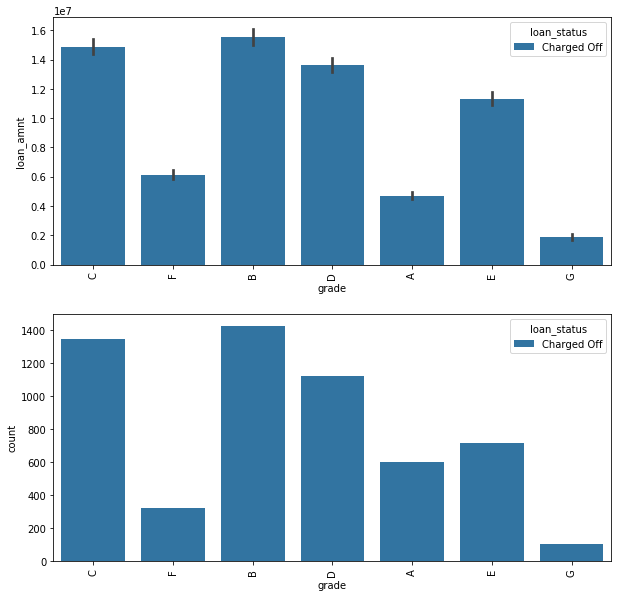

In [428]:
pltUniVariableAnalysis('grade',lending_club_ChargedOff)

# Data Cleanup for grade

# Insights for grade

* Maximum Loan Provided to A, B, C and D Group Subscriber
* Maximum loan provided to B,C and D Group "Charged Off" subscriber 

# Data Analysis for sub_grade

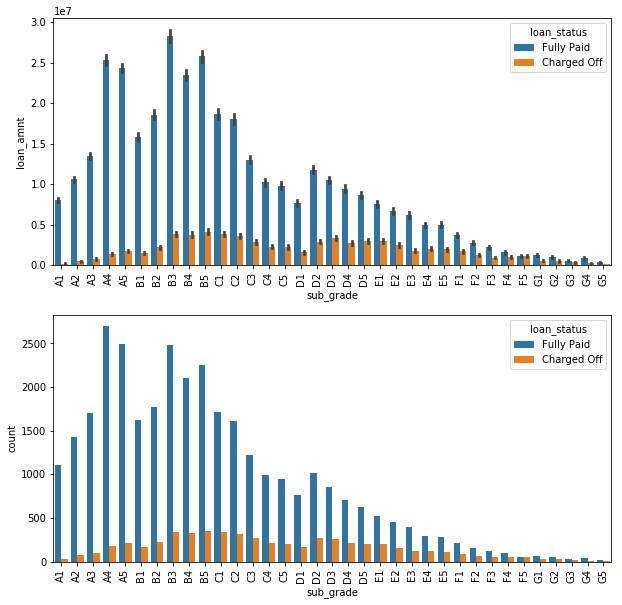

In [429]:
pltUniVariableAnalysis('sub_grade', lending_club.sort_values(by='sub_grade'))

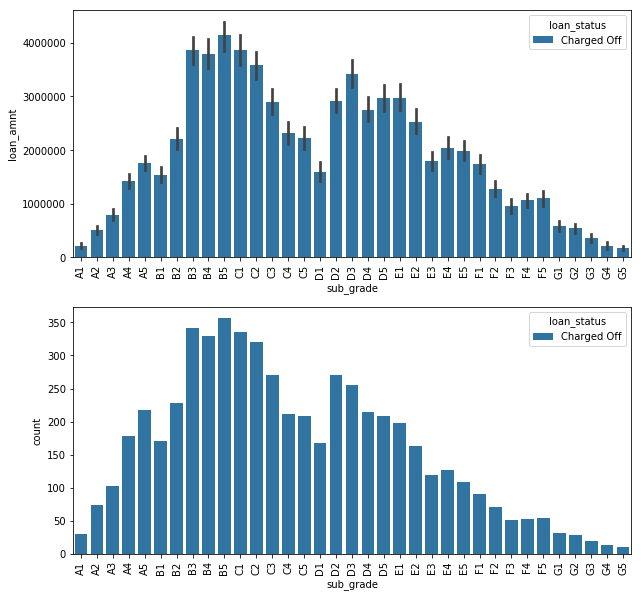

In [430]:
pltUniVariableAnalysis('sub_grade', lending_club_ChargedOff.sort_values(by='sub_grade'))

# Data Cleanup for sub_grade

# Insights for sub_grade

* Most of the Loans are Given in Upper Sub-Grades

# Data Analysis for emp_title

# Data Cleanup for emp_title

# Insights for emp_title

# Data Analysis for emp_length

In [431]:
lending_club.emp_length.fillna('0',inplace=True)
print(np.dtype(lending_club.emp_length))
lending_club['emp_length']=lending_club['emp_length'].apply(lambda x: str(x).split("year")[0].strip().split("+")[0]).apply(lambda x: 0 if str(x).find("<") >=0 else x)
lending_club['emp_length']=lending_club.emp_length.astype(int)
print(np.dtype(lending_club.emp_length))

/Users/amirisev/.local/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/amirisev/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


object
int64


/Users/amirisev/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Data Cleanup for emp_length

# Insights for emp_length

# Data Analysis for home_ownership

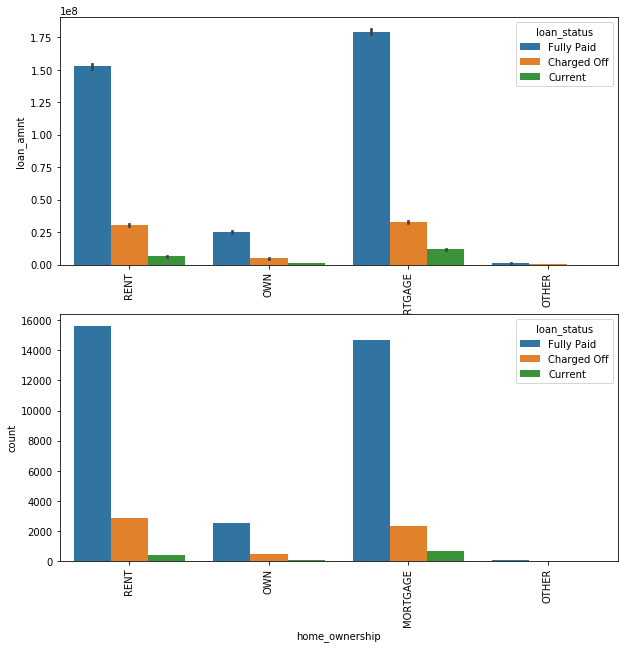

In [432]:
pltUniVariableAnalysis('home_ownership',lending_club_master)

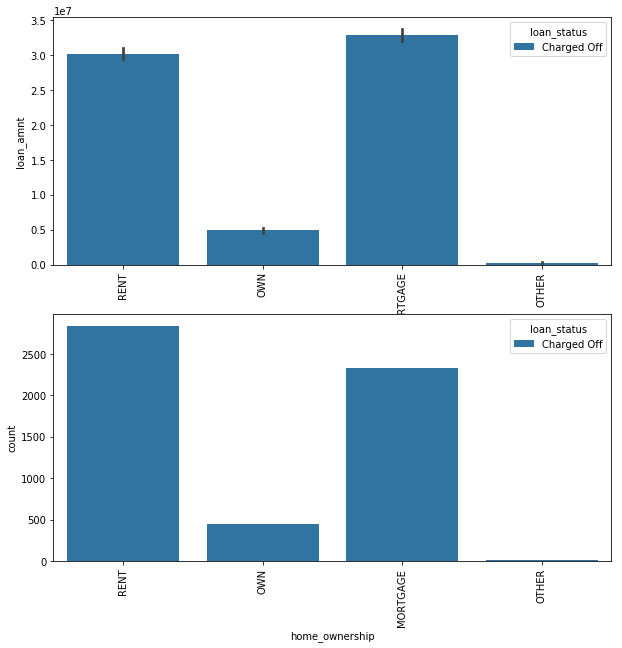

In [433]:
pltUniVariableAnalysis('home_ownership', lending_club_ChargedOff)

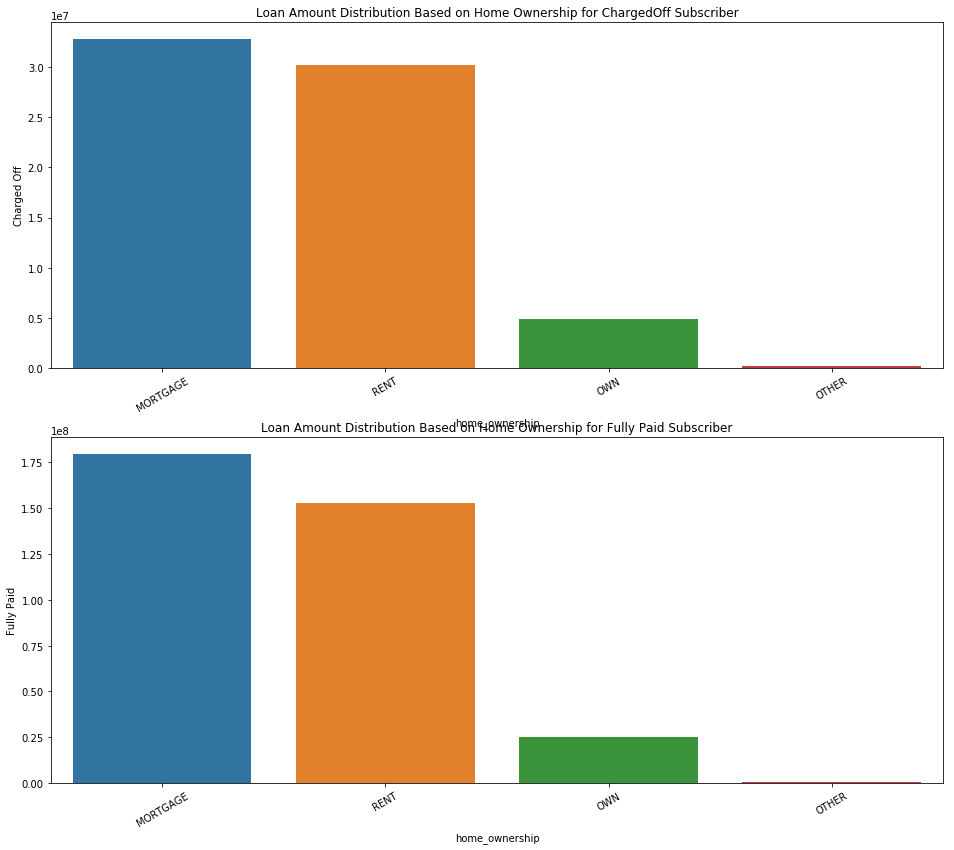

In [434]:
columnName = 'home_ownership'
title1 = 'Loan Amount Distribution Based on Home Ownership for ChargedOff Subscriber'
title2 = 'Loan Amount Distribution Based on Home Ownership for Fully Paid Subscriber'
pltCategorical(columnName, title1, title2)

# Data Cleanup for home_ownership

# Insights for home_ownership

* Most of the Defaulter Home Ownership status is "Mortgage" and "Rent".

# Data Analysis for annual_inc

count    3.857400e+04
mean     6.877704e+04
std      6.422001e+04
min      4.000000e+03
0%       4.000000e+03
10%      3.000000e+04
20%      3.719808e+04
30.0%    4.450000e+04
40%      5.000400e+04
50%      5.886028e+04
60.0%    6.500400e+04
70%      7.500000e+04
80%      9.000000e+04
90%      1.150000e+05
100%     6.000000e+06
max      6.000000e+06
Name: annual_inc, dtype: float64
Number of null values for the column annual_inc : 0


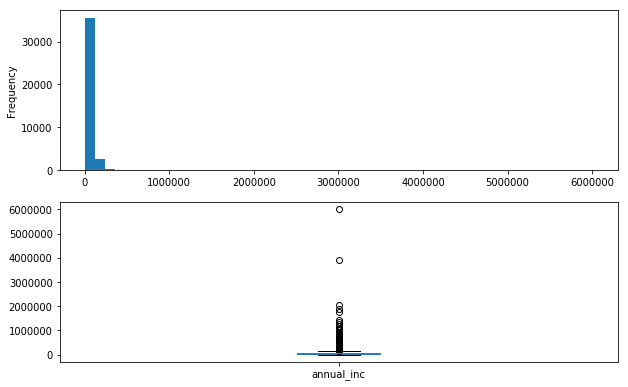

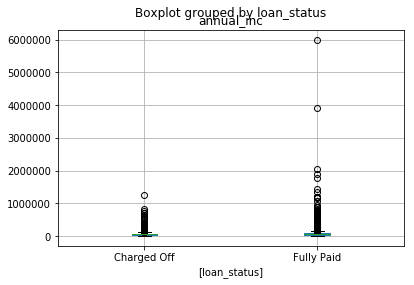

In [435]:
do_analysis(lending_club, 'annual_inc')

# Data Cleanup for annual_inc

In [436]:
# 5th percentile
lending_club.annual_inc.quantile(0.05)

24000.0

In [437]:
#What percent of values fall below the 5th percentile?
percent = lending_club.loc[lending_club['annual_inc'] < 24000].shape[0] * 100 / lending_club.shape[0]
print("% .2f" % percent)

 4.62


In [438]:
# 95th percentile
lending_club.annual_inc.quantile(0.99)

234161.99999999808

In [439]:
# Percentage of values that fall in above the 99th percentile (i.e top 1 percentile)
percent = lending_club.loc[lending_club['annual_inc'] > 234999].shape[0] * 100/ lending_club.shape[0]
print("% .2f" % percent)

 1.00


In [440]:
lending_club['annual_inc'].describe()

count    3.857400e+04
mean     6.877704e+04
std      6.422001e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886028e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

The spread is between around 40,000 and 82,300. We will drop the outliers top 99 percentile. We will not remove the bottom 5 percentile because the lenders can be from the low income group. Also below the 5th percentile, there are 5% of rows. so we will not remove the bottom 5th percentile.

In [441]:
# Removing the top 1 percentile of outliers
lending_club = lending_club.loc[lending_club['annual_inc'] < 234999]

# Insights for annual_inc

# Data Analysis for verification_status

# Data Cleanup for verification_status

# Insights for verification_status

# Data Analysis for issue_d

In [442]:
lending_club['issue_d']
lending_club['issue_month']=lending_club['issue_d'].apply(lambda x:x.split('-')[0])
lending_club['issue_year']=lending_club['issue_d'].apply(lambda x:x.split('-')[1])
lending_club['issue_year'].apply(pd.to_numeric)

0        11
1        11
2        11
3        11
5        11
6        11
7        11
8        11
9        11
10       11
11       11
12       11
13       11
14       11
15       11
16       11
17       11
18       11
19       11
20       11
21       11
22       11
23       11
24       11
25       11
26       11
27       11
28       11
29       11
30       11
         ..
39686     7
39687     7
39688     7
39689     7
39690     7
39691     7
39693     7
39694     7
39695     7
39696     7
39697     7
39698     7
39699     7
39700     7
39701     7
39702     7
39703     7
39704     7
39705     7
39706     7
39707     7
39708     7
39709     7
39710     7
39711     7
39712     7
39713     7
39714     7
39715     7
39716     7
Name: issue_year, Length: 38190, dtype: int64

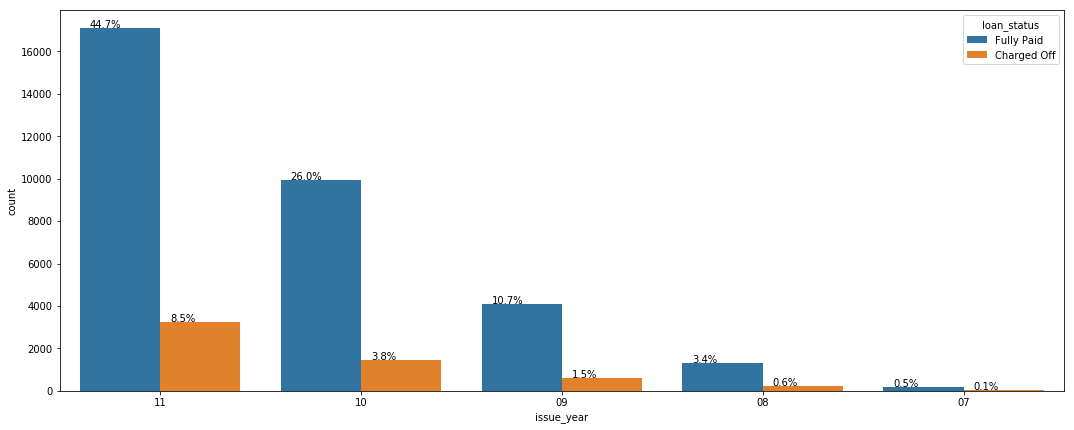

In [443]:
percentileanalysis('issue_year','loan_status')

# Data Cleanup for issue_d

No clean up done for issue_d as there are no null values.

# Insights for issue_d

# Data Analysis for loan_status

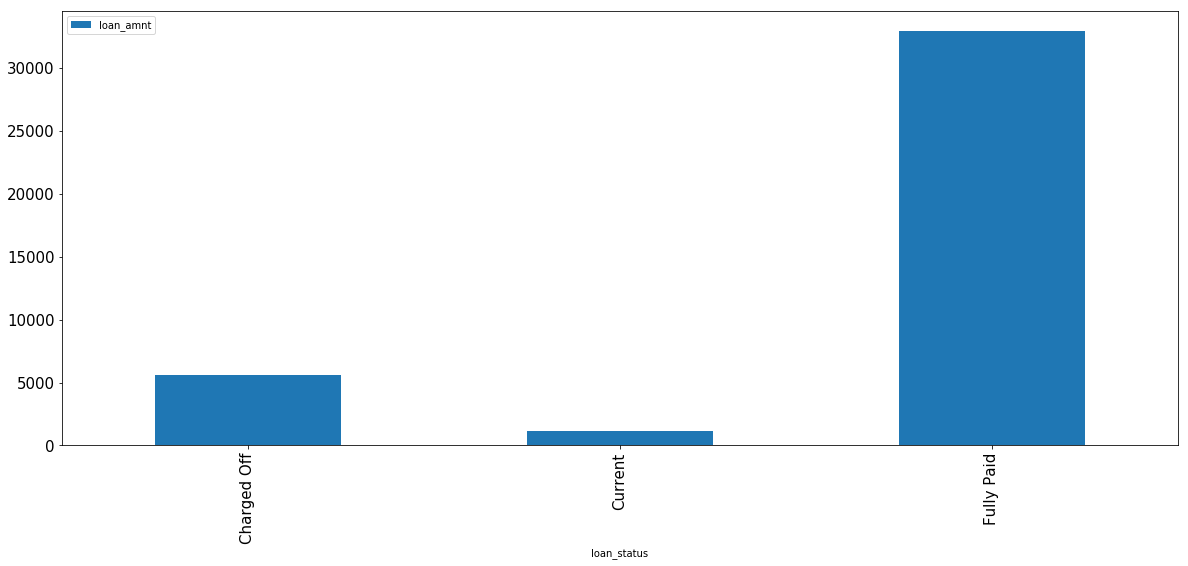

In [444]:
lending_club_master.pivot_table(values='loan_amnt', index='loan_status', aggfunc='count').plot(kind='bar', stacked=True, figsize=(20, 8), fontsize=15)


# Data Cleanup for loan_status

# Insights for loan_status

* Number of Defaulters are Comparatively more than the susbcriber for which running. Fully Paid Loan subscriber Count is Higest

# Data Analysis for url

# Data Cleanup for url

# Insights for url

# Data Analysis for desc

# Data Cleanup for desc

# Insights for desc

 # Data Analysis for purpose

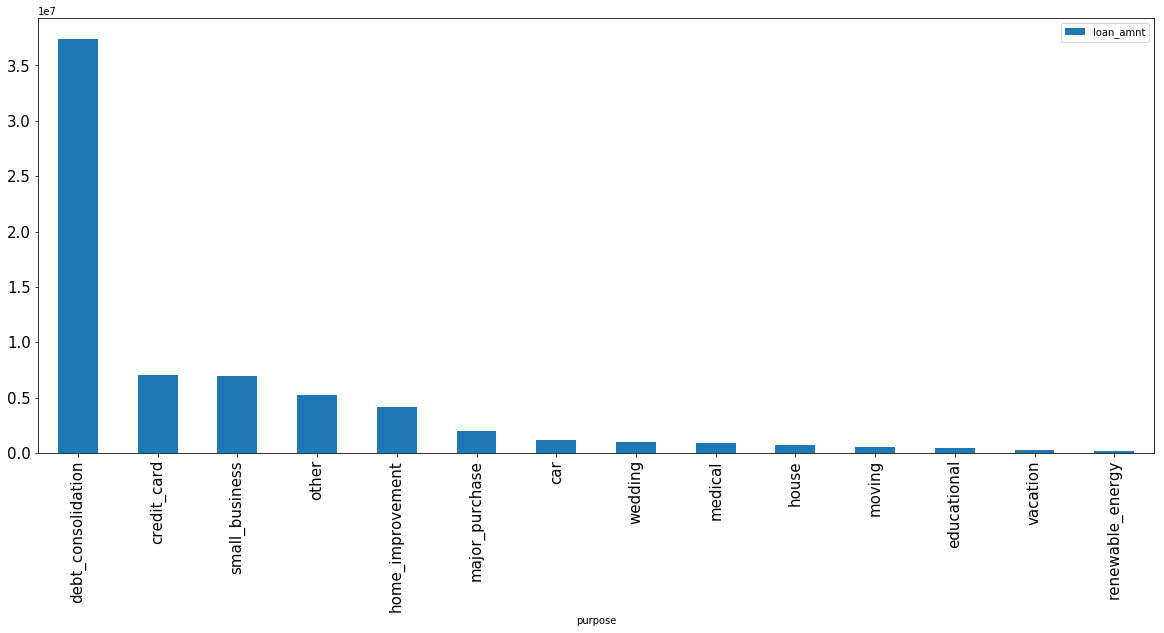

In [445]:
lending_club_ChargedOff.pivot_table(values='loan_amnt', index='purpose', aggfunc='sum').sort_values(by='loan_amnt', ascending=False).plot(kind='bar', stacked=True, figsize=(20, 8), fontsize=15)

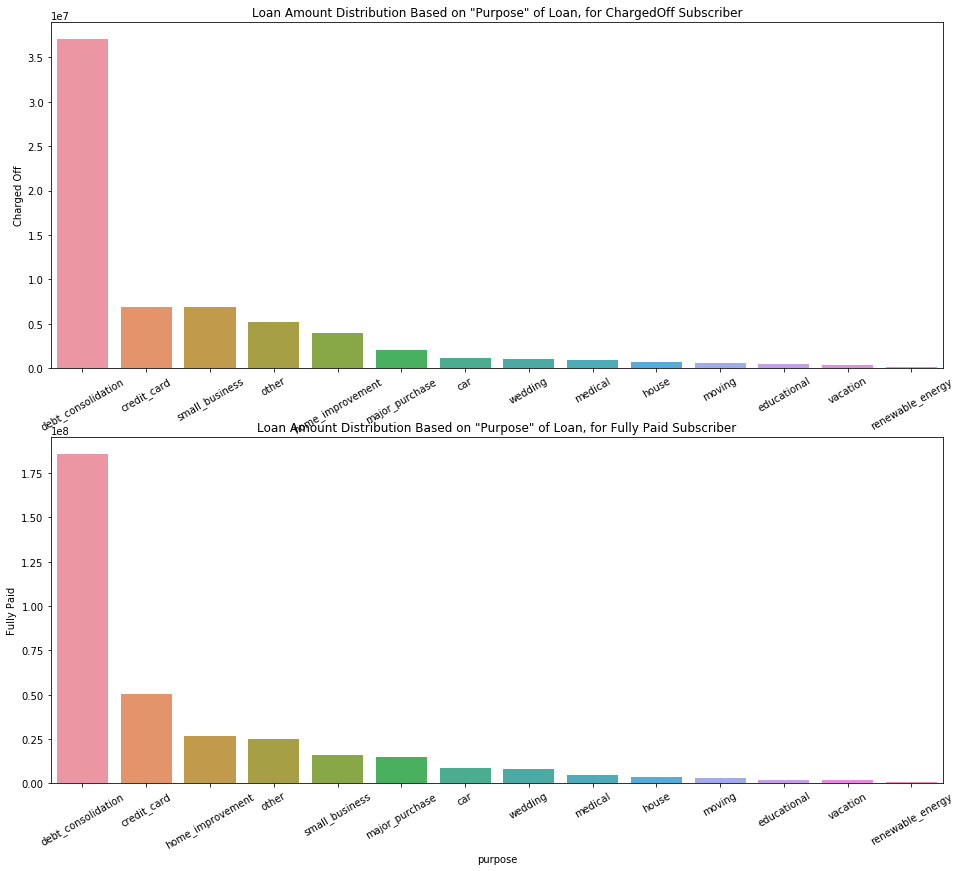

In [446]:
columnName = 'purpose'
title1 = 'Loan Amount Distribution Based on "Purpose" of Loan, for ChargedOff Subscriber'
title2 = 'Loan Amount Distribution Based on "Purpose" of Loan, for Fully Paid Subscriber'
pltCategorical(columnName, title1, title2)

# Data Cleanup for purpose

# Insights for purpose

* Major purpose of the loan (amount wise) for the defaulters are "Debt Consolidation", "Credit_card" and "Small Business" For ChargedOff Susbcriber
* For FullPaid Subscriber, 3rd most loan amount category is "Home Improvement"

# Data Analysis for title

# Data Cleanup for title

# Insights for title

# Data Analysis for zip_code

# Data Cleanup for zip_code

# Insights for zip_code

# Data Analysis for addr_state

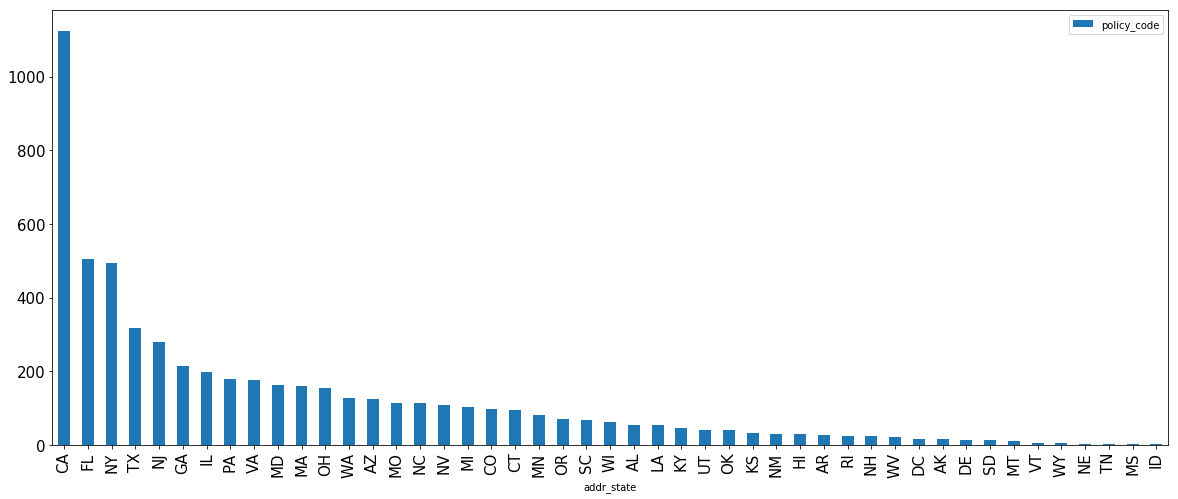

In [447]:
df1_addr_state = lending_club_ChargedOff.pivot_table(values='policy_code', index='addr_state', aggfunc='count').sort_values(by='policy_code', ascending=False)
df1_addr_state.plot(kind='bar', stacked=True, figsize=(20, 8), fontsize=15)

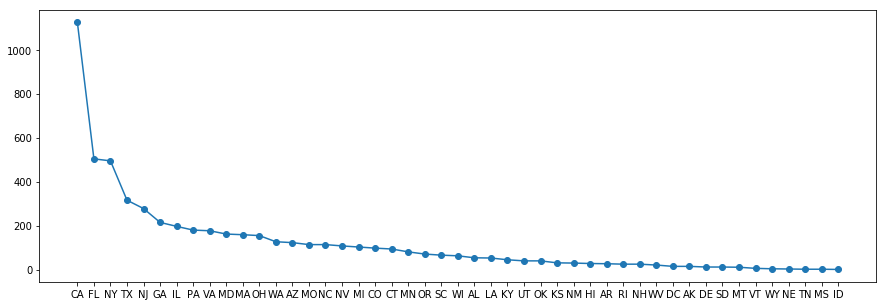

In [448]:
df1_addr_state = df1_addr_state.reset_index()
plt.figure(figsize=(15,5))
plt.plot(df1_addr_state.addr_state, df1_addr_state.policy_code, 'o-')
plt.show()

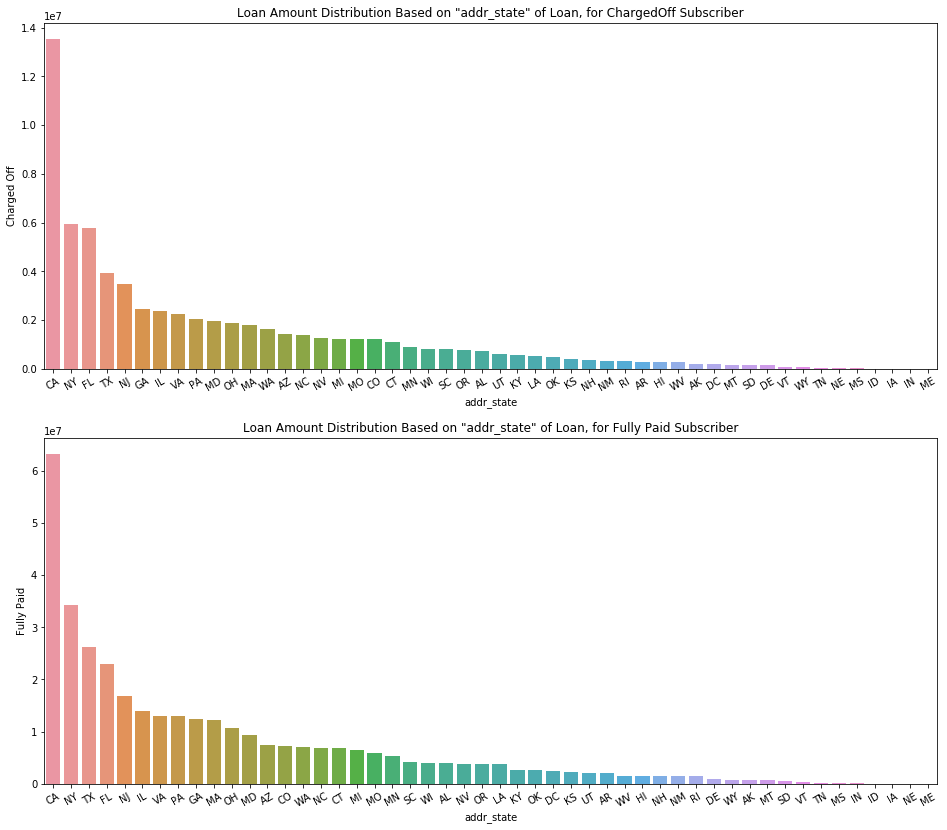

In [449]:
columnName = 'addr_state'
title1 = 'Loan Amount Distribution Based on "addr_state" of Loan, for ChargedOff Subscriber'
title2 = 'Loan Amount Distribution Based on "addr_state" of Loan, for Fully Paid Subscriber'
pltCategorical(columnName, title1, title2)

# Data Cleanup for addr_state

# Insights for addr_state

* Top States based on Loan_amount is different based on Loan_status
* Overal Top3 Categories are:
    * CA
    * FL
    * NY
* Fully Paid Category top3 are:
    * CA
    * NY
    * TX
* Charged Off Categories Top3 Are:
    * CA
    * NY
    * FL


# Data Analysis for dti

count    38190.000000
mean        13.333638
std          6.657797
min          0.000000
0%           0.000000
10%          4.130000
20%          7.020000
30.0%        9.330000
40%         11.420000
50%         13.430000
60.0%       15.380000
70%         17.490000
80%         19.750000
90%         22.310000
100%        29.990000
max         29.990000
Name: dti, dtype: float64
Number of null values for the column dti : 0


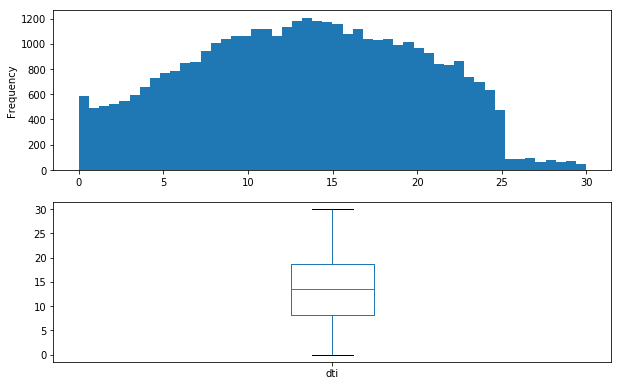

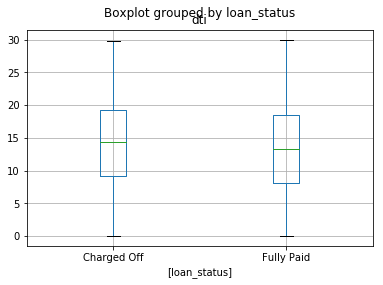

In [450]:
do_analysis(lending_club, 'dti')

# Data Cleanup for dti

### Since there are no null values, and no outliers for dti, there is no need to do a datacleanup

# Insights for dti

## Insight: The dti for charged off loans is higher than the fully paid loans

# Data Analysis for delinq_2yrs

# Data Cleanup for delinq_2yrs

# Insights for delinq_2yrs

# Data Analysis for earliest_cr_line

In [451]:
lending_club['earliest_cr_line']
lending_club['earliestcrline_month']=lending_club['earliest_cr_line'].apply(lambda x:x.split('-')[0])
lending_club['earliestcrline_year']=lending_club['earliest_cr_line'].apply(lambda x:x.split('-')[1])
lending_club['earliestcrline_year'].apply(pd.to_numeric)

0        85
1        99
2         1
3        96
5         4
6         5
7         7
8         4
9         4
10       98
11       89
12        4
13        3
14       91
15        7
16       98
17       93
18        3
19        1
20       97
21       83
22       85
23        3
24        1
25        2
26        3
27        3
28       84
29        6
30       87
         ..
39686     1
39687    95
39688    96
39689     4
39690    69
39691     3
39693     2
39694    87
39695     0
39696     0
39697     3
39698    99
39699    95
39700    89
39701    92
39702    93
39703    97
39704     0
39705    97
39706    96
39707    95
39708    95
39709    96
39710    97
39711    94
39712    90
39713    86
39714    98
39715    88
39716     3
Name: earliestcrline_year, Length: 38190, dtype: int64

00    3144
99    2882
98    2756
01    2449
97    2370
96    2178
95    2054
94    1911
02    1881
03    1807
04    1721
05    1465
93    1438
06    1154
92    1016
90     982
91     917
89     816
07     697
88     692
87     577
86     471
85     435
84     381
83     311
82     210
81     177
80     171
78     160
79     154
08     151
77     110
76      92
75      82
74      61
73      60
72      48
70      47
71      44
69      36
68      19
67      17
66      11
63      10
65       7
62       5
64       5
54       2
61       2
59       1
46       1
56       1
50       1
Name: earliestcrline_year, dtype: int64
loan_status          Charged Off  Fully Paid    All
earliestcrline_year                                
00                         496.0      2648.0   3144
01                         354.0      2095.0   2449
02                         254.0      1627.0   1881
03                         224.0      1583.0   1807
04                         228.0      1493.0   1721
05           

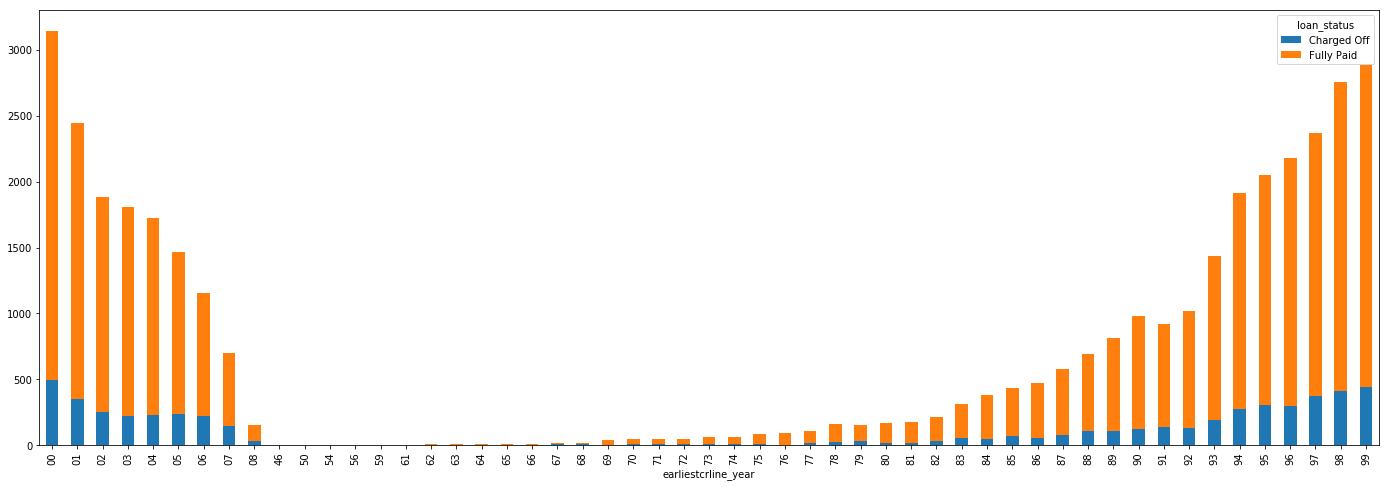

In [452]:
do_analysis_categorical(lending_club, 'earliestcrline_year')


# Data Cleanup for earliest_cr_line

Since there are no null values no cleanup is needed.

#### Insights for earliest_cr_line¶

Business for banks increased in terms of number of loans, can be predicted to increase in coming years in similar format.


# Data Analysis for inq_last_6mths

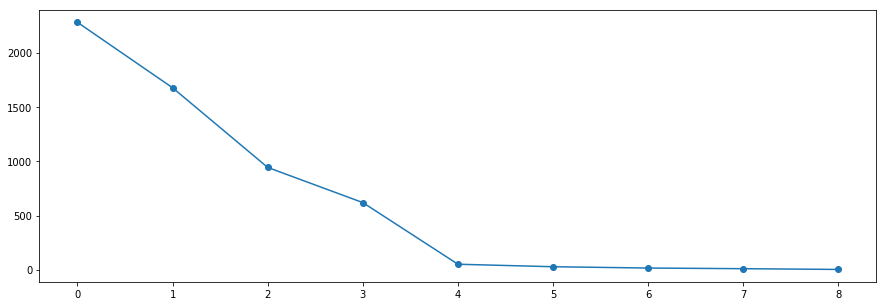

In [453]:
df1_inq_last_6mths = lending_club_ChargedOff.pivot_table(values='policy_code', index='inq_last_6mths', aggfunc='count').reset_index()
plt.figure(figsize=(15,5))
plt.plot(df1_inq_last_6mths.inq_last_6mths, df1_inq_last_6mths.policy_code, '-o')
plt.show()

# Data Cleanup for inq_last_6mths

# Insights for inq_last_6mths

* Number of Inquary Count is more from (0 to 4) in last 6 months period

# Data Analysis for mths_since_last_delinq

count    13515.000000
mean        35.935627
std         22.029297
min          0.000000
0%           0.000000
10%          8.000000
20%         15.000000
30.0%       21.000000
40%         27.000000
50%         34.000000
60.0%       40.000000
70%         47.000000
80%         57.000000
90%         69.000000
100%       120.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64
Number of null values for the column mths_since_last_delinq : 24675


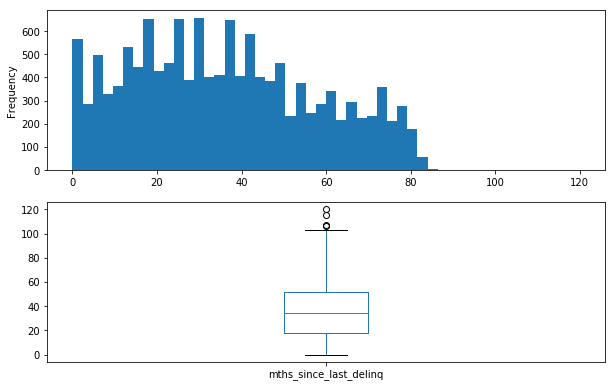

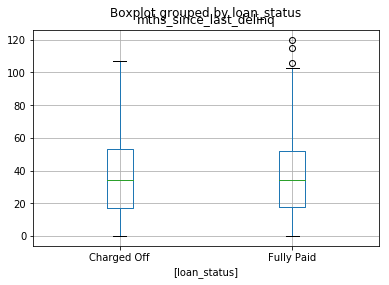

In [454]:
do_analysis(lending_club, 'mths_since_last_delinq')

# Data Cleanup for mths_since_last_delinq

In [455]:
# There are 24675 null values. The null values means that the customer has been repaying the loan on time.
# We will do this data cleanup by imputing these null values to 0.
lending_club.loc[lending_club['mths_since_last_delinq'].isnull(),'mths_since_last_delinq'] = 0

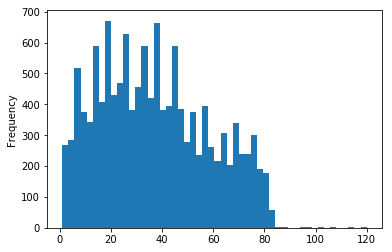

In [456]:
# Analysis of mths_since_last_delinq excluding the 0 values.
lending_club.loc[lending_club['mths_since_last_delinq'] != 0]['mths_since_last_delinq'].plot(kind='hist', bins=50)

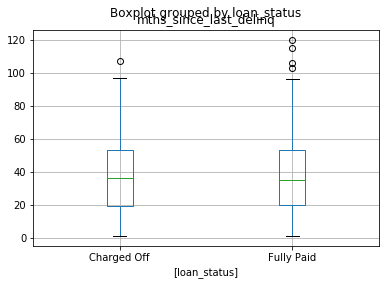

In [457]:
lending_club.loc[lending_club['mths_since_last_delinq'] != 0][['mths_since_last_delinq', 'loan_status']].boxplot(by='loan_status') 

# Insights for mths_since_last_delinq

### Charged off loans have a higher months since last delinquient

# Data Analysis for mths_since_last_record

# Data Cleanup for mths_since_last_record

# Insights for mths_since_last_record

# Data Analysis for open_acc

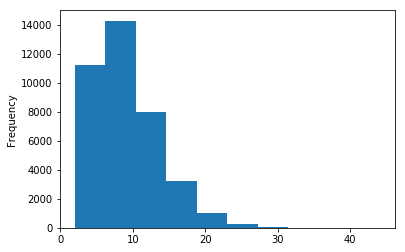

In [458]:
#do_analysis(lending_club, 'open_acc')
lending_club['open_acc'].plot(kind='hist')

count    38190.000000
mean        47.162328
std         18.686415
min          5.128205
0%           5.128205
10%         25.000000
20%         30.952381
30.0%       35.555556
40%         40.000000
50%         44.444444
60.0%       50.000000
70%         55.000000
80%         62.500000
90%         73.333333
100%       175.000000
max        175.000000
Name: Ratio_Open_Total_acc, dtype: float64
Number of null values for the column Ratio_Open_Total_acc : 0


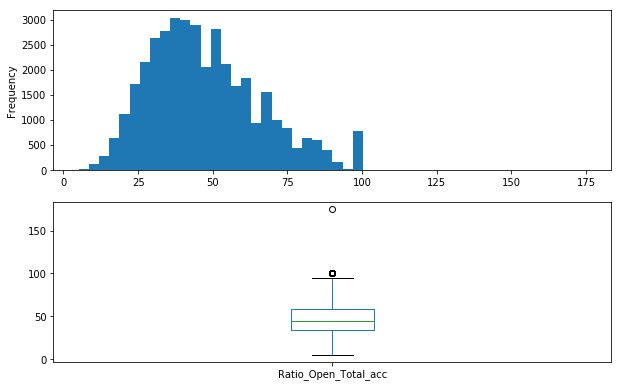

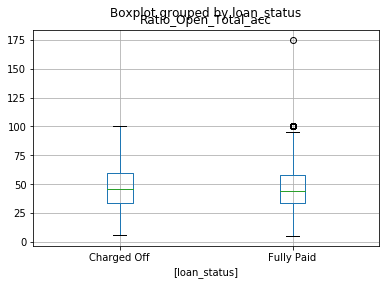

In [459]:
#DERIVED 

lending_club['Ratio_Open_Total_acc']=(lending_club['open_acc']/lending_club['total_acc'])*100
#lending_club['Ration_Open_Total_acc']
do_analysis(lending_club, 'Ratio_Open_Total_acc')

# Data Cleanup for open_acc

No Data Clean up done.

# Insights for open_acc

There are profiles with as 10 open accounts is the highest.
There are outliers with more than 20 open accounts .
Out of 3000 profiles  around 800 have the open_acc/total_acc ratio as 100% ie all loans are either Current/ChargedOff
These profiles should never be considered for next loan request,Also need to check for 75% and above cases.

# Data Analysis for pub_rec

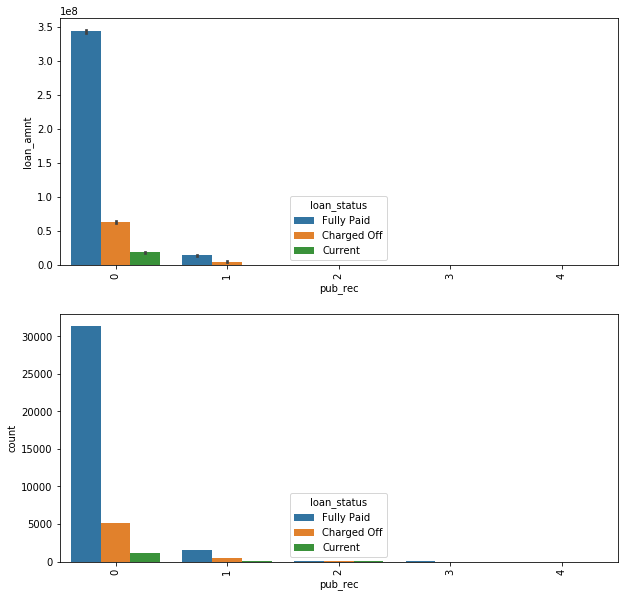

In [460]:
#lending_club_master.pivot_table(values='policy_code', index='pub_rec', aggfunc='count', columns=['loan_status']).plot(kind='bar', stacked=True, figsize=(20, 8), fontsize=15)
pltUniVariableAnalysis('pub_rec', lending_club_master)

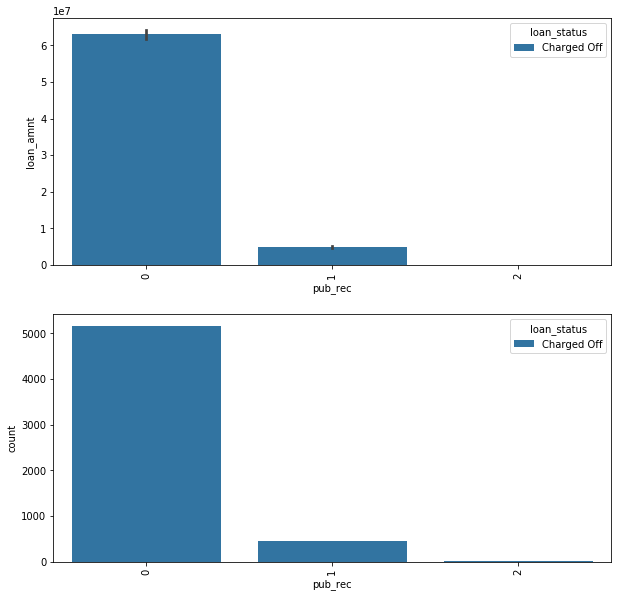

In [461]:
pltUniVariableAnalysis('pub_rec', lending_club_ChargedOff)

# Data Cleanup for pub_rec

# Insights for pub_rec

* Most of the applicant attitude was fine. Maximum are under 0 complain section. Defaulters are only in the category of no complain or 1 complain zone.

# Data Analysis for revol_bal

count     38190.000000
mean      13077.999869
std       15427.815017
min           0.000000
0%            0.000000
10%        1092.000000
20%        2770.800000
30.0%      4541.700000
40%        6487.000000
50%        8705.500000
60.0%     11316.000000
70%       14605.300000
80%       19397.800000
90%       28541.000000
100%     149588.000000
max      149588.000000
Name: revol_bal, dtype: float64
Number of null values for the column revol_bal : 0


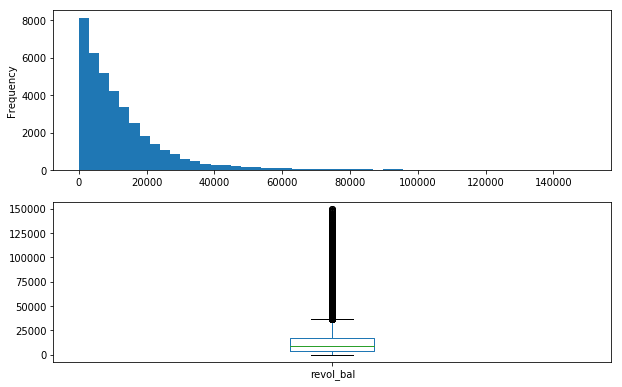

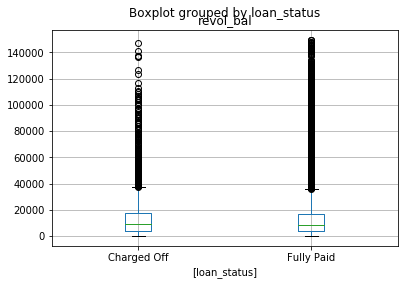

In [462]:
do_analysis(lending_club, 'revol_bal')

# Data Cleanup for revol_bal

In [463]:
# 90% of the revol_bal values are under 28, 541 dollars. The max loan amount is around 35, 000 dollars.
# It is likely that the values above 80, 000 are outliers, and we can remove them.
# Lets look at the percentage of rows where revol_bal is above 80,000
lending_club.loc[lending_club['revol_bal'] > 80000].shape[0] * 100 / lending_club.shape[0]

1.0002618486514794

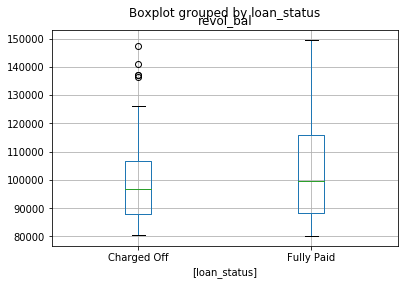

In [464]:
# To decide if we can drop these rows we will see if there is a major correlation between
# revol_bal and charged off for values over 60,000
lending_club.loc[lending_club['revol_bal'] > 80000][['revol_bal', 'loan_status']].boxplot(by='loan_status')

In [465]:
# Since there is a visible corelation between revolving balance and loan status, we cannot remove the values above 80,000
# The values above 80, 000 seem to be valid values.

In [466]:
lending_club[['revol_bal', 'loan_status']].groupby('loan_status').quantile([0.5])

,,revol_bal
loan_status,,
Charged Off,0.5,9176.5
Fully Paid,0.5,8631.5


# Insights for revol_bal

### The median revolving balance for charged off loans is 6.3% higher than the fully paid loans.

In [467]:
# Is revol_bal and revol_util corelated. They are not highly corelated.
lending_club[['revol_bal','revol_util']].corr()

,revol_bal,revol_util
revol_bal,1.000000,0.302721
revol_util,0.302721,1.000000


# Data Analysis for revol_util

# Data Cleanup for revol_util

# Insights for revol_util

# Data Analysis for total_acc

count    38190.000000
mean        21.974836
std         11.383505
min          2.000000
0%           2.000000
10%          9.000000
20%         12.000000
30.0%       15.000000
40%         17.000000
50%         20.000000
60.0%       23.000000
70%         27.000000
80%         31.000000
90%         37.000000
100%        90.000000
max         90.000000
Name: total_acc, dtype: float64
Number of null values for the column total_acc : 0


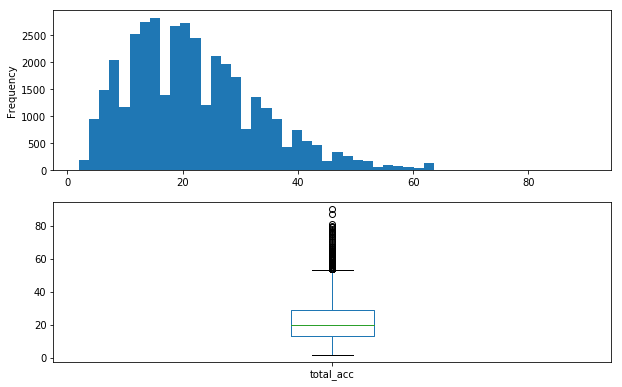

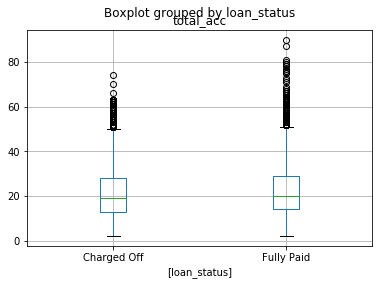

In [468]:
lending_club['total_acc']
do_analysis(lending_club, 'total_acc')

# Data Cleanup for total_acc

no data clean up done as no null values or incorrect values

# Insights for total_acc

There are around 2800 profiles with total accounts around 18
All profiles with charged off/current/Fully paid status have 20 total accounts on an average


# Data Analysis for out_prncp

# Data Cleanup for out_prncp

# Insights for out_prncp

# Data Analysis for out_prncp_inv

count    38190.0
mean         0.0
std          0.0
min          0.0
0%           0.0
10%          0.0
20%          0.0
30.0%        0.0
40%          0.0
50%          0.0
60.0%        0.0
70%          0.0
80%          0.0
90%          0.0
100%         0.0
max          0.0
Name: out_prncp_inv, dtype: float64
Number of null values for the column out_prncp_inv : 0


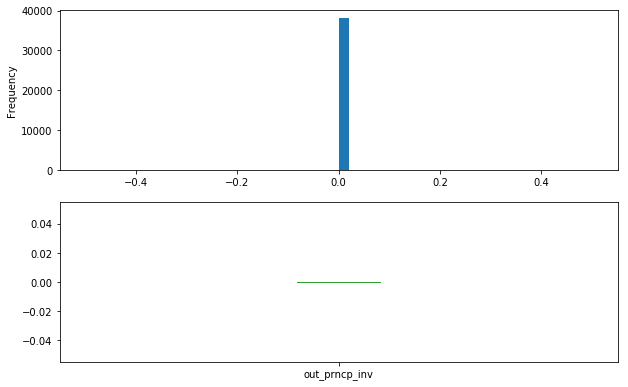

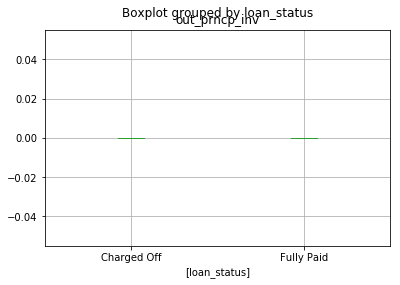

In [469]:
lending_club['out_prncp_inv'].value_counts()
do_analysis(lending_club,'out_prncp_inv')

# Data Cleanup for out_prncp_inv

In [470]:
#since most of the outstanding prnc is 0 need to filter out to get better insights
lending_club_temp=lending_club.loc[lending_club['out_prncp_inv'] > 0]
#lending_club_temp['out_prncp_inv']
#do_analysis(lending_club_temp,'out_prncp_inv')

# Insights for out_prncp_inv

Most of the profiles have dollars 600 as the outstanding_prncp_inv while the next peak is at  dollars 1200 .
Highest outstanding prncipal is around dollars 6300


# Data Analysis for total_pymnt

Total Number of Records:  39714
Total Unique Counts of the Records:  37847
count    38190.000000
mean     11767.212967
std       8696.546176
min          0.000000
0%           0.000000
10%       2903.992589
20%       4671.019472
30.0%     6093.307181
40%       7673.605898
50%       9614.195000
60.0%    11678.646520
70%      14243.160989
80%      17785.408670
90%      23882.842285
100%     58563.679930
max      58563.679930
Name: total_pymnt, dtype: float64
Number of null values for the column total_pymnt : 0


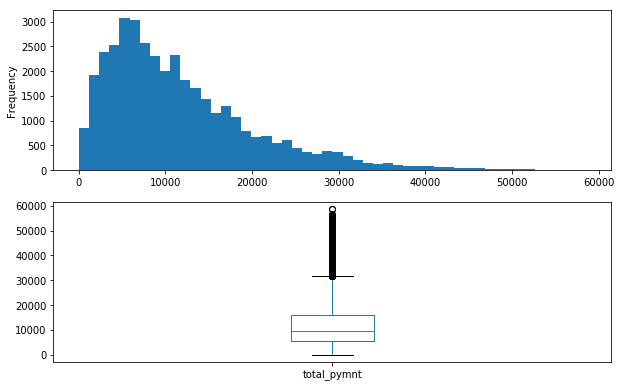

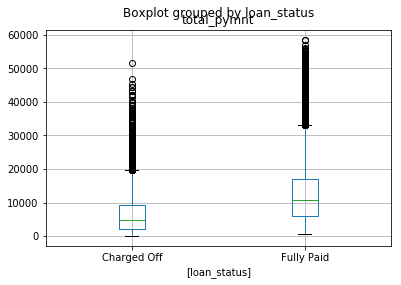

In [471]:
print("Total Number of Records: ", lending_club_master['total_pymnt'].shape[0])
print("Total Unique Counts of the Records: ", len(lending_club_master['total_pymnt'].unique()))
do_analysis(lending_club, 'total_pymnt')

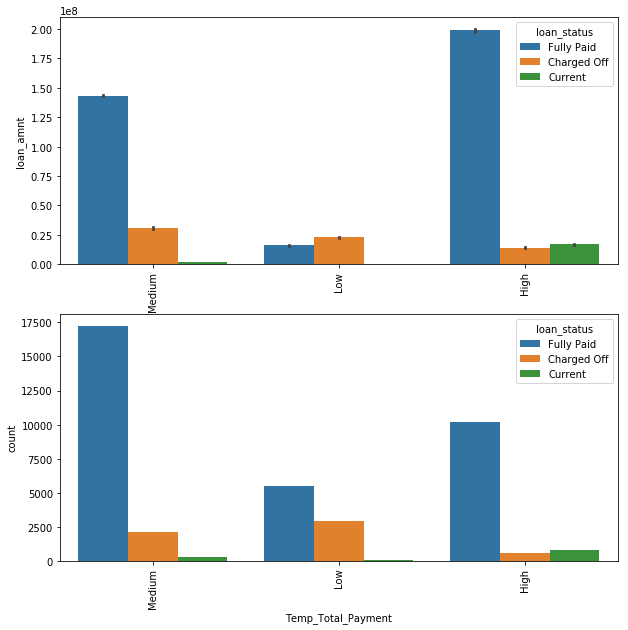

In [472]:
def splitTotalPayment(x):
    if x <= 5000:
        return "Low"
    elif x <= 15000:
        return "Medium"
    else:
        return "High"
lending_club_master['Temp_Total_Payment'] = lending_club_master['total_pymnt'].apply(splitTotalPayment)
pltUniVariableAnalysis('Temp_Total_Payment', lending_club_master)
lending_club_master.drop(columns='Temp_Total_Payment', inplace=True)

# Data Cleanup for total_pymnt

# Insights for total_pymnt

* Maximum total_payment within the Range of 5K to 15K
* Average Total Payment is more for Fully Paid Subscriber than ChargedOff Susbcriber.

# Data Analysis for total_pymnt_inv

# Data Cleanup for total_pymnt_inv

# Insights for total_pymnt_inv

# Data Analysis for total_rec_prncp

# Data Cleanup for total_rec_prncp

# Insights for total_rec_prncp

# Data Analysis for total_rec_int

count    38190.000000
mean      2098.274761
std       2355.126239
min          0.000000
0%           0.000000
10%        308.655000
20%        528.794000
30.0%      751.287000
40%        994.722000
50%       1291.920000
60.0%     1692.964000
70%       2265.927000
80%       3151.934000
90%       4841.713000
100%     23563.680000
max      23563.680000
Name: total_rec_int, dtype: float64
Number of null values for the column total_rec_int : 0


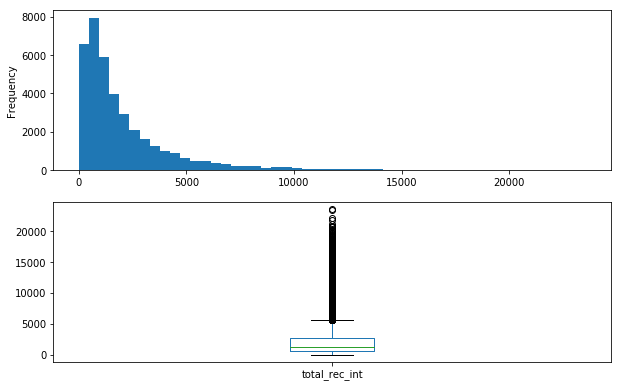

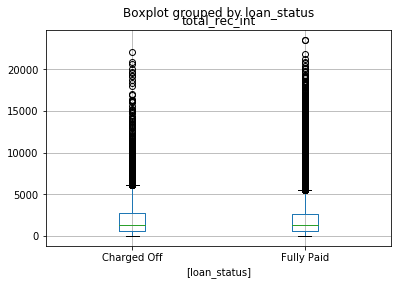

In [473]:
#lending_club['total_rec_int'].value_counts()
do_analysis(lending_club,'total_rec_int')

# Data Cleanup for total_rec_int

Though there are outliers , removing them will not have a significant impact hence retaining them.

# Insights for total_rec_int

High number of profiles around 6500 have paid  dollars 0.0 interest : reason has to be found and such profiles should be handled sepearately.
There are few profiles having paid around  dollars 23000   : can checked if principal <interest recovered and waive off the loan
    

# Data Analysis for total_rec_late_fee

In [474]:
checkNullPerForColumns('total_rec_late_fee')
totalChargedOffSub = lending_club_ChargedOff['total_rec_late_fee'].shape[0]
positiveLatePayment = len(lending_club_ChargedOff[lending_club_ChargedOff['total_rec_late_fee'] > 0])
print("Total Number of Subscriber Records: ==>", totalChargedOffSub)
print("Total Unique Counts of the Records: ==>", len(lending_club_ChargedOff['total_rec_late_fee'].unique()))
print("Total Number of +ve Late Payment, ChargedOff Subscriber: ==>",positiveLatePayment)
print("% of ChargedOff Subscriber Done Late Payment: ==>",  round((positiveLatePayment/totalChargedOffSub)*100, 0))
print(lending_club_master.groupby(['loan_status'])['total_rec_late_fee'].agg(['count', 'sum']))

Null Percentage of the Column is: ==>  0.0
Total Number of Subscriber Records: ==> 5627
Total Unique Counts of the Records: ==> 829
Total Number of +ve Late Payment, ChargedOff Subscriber: ==> 863
% of ChargedOff Subscriber Done Late Payment: ==> 15.0
             count           sum
loan_status                     
Charged Off   5627  24149.351283
Current       1140   1337.080719
Fully Paid   32947  28648.443189


# Data Cleanup for total_rec_late_fee

# Insights for total_rec_late_fee

* Maximum LatePayment count is under "FullyPaid" Section
* 15% of the ChargedOff Subscriber Does the Late Payment
* Not a direct impact to the ChargedOff Subscriber, Need to use this field along with other Money Related Fields.

# Data Analysis for recoveries

count    38190.000000
mean        97.606055
std        695.965913
min          0.000000
0%           0.000000
10%          0.000000
20%          0.000000
30.0%        0.000000
40%          0.000000
50%          0.000000
60.0%        0.000000
70%          0.000000
80%          0.000000
90%         16.383000
100%     29623.350000
max      29623.350000
Name: recoveries, dtype: float64
Number of null values for the column recoveries : 0


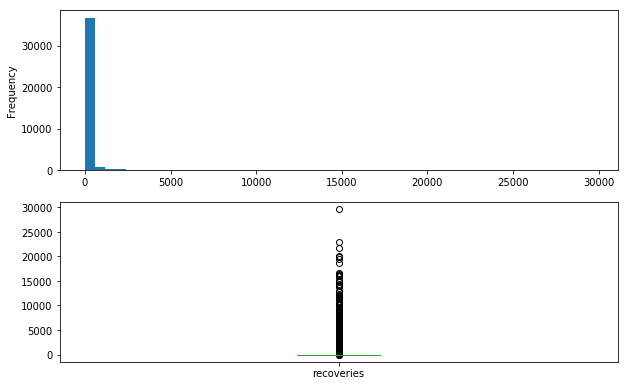

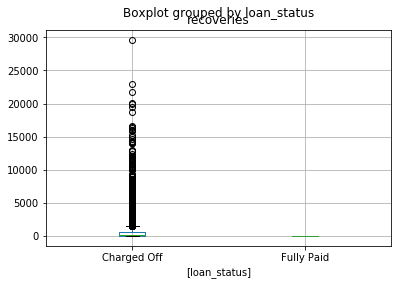

In [475]:
do_analysis(lending_club, 'recoveries')

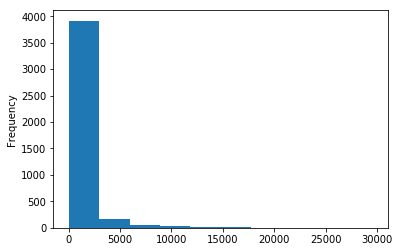

In [476]:
# Recovery is non zero for only charged off loans. So we will analyse recovery for Charged Off loans
lending_club.loc[lending_club['recoveries'] > 0]['recoveries'].plot(kind='hist')

# Data Cleanup for recoveries

In [477]:
# There are no null values for recoveries. Therefore there is no need for data cleanup.
# Recoveries is 0 for fully paid loans

# Insights for recoveries

In [478]:
lending_club[['recoveries', 'loan_status']].groupby('loan_status').quantile([.5])

,,recoveries
loan_status,,
Charged Off,0.5,172.965
Fully Paid,0.5,0.000


### Recoveries are 0 for Fully Paid and median recovery is 172 for charged off loans
### Since Recovery happens after the loan defaults, this cannot be an independant variable when it comes to loan status

# Data Analysis for collection_recovery_fee

# Data Cleanup for collection_recovery_fee

# Insights for collection_recovery_fee

# Data Analysis for last_pymnt_d

In [479]:
lending_club['last_pymnt_d']
lending_club['last_pymnt_d']=lending_club['last_pymnt_d'].astype(str)
lending_club['last_pymnt_month']=lending_club['last_pymnt_d'].apply(lambda x:x.split('-')[0])
#lending_club['last_pymnt_year']=lending_club['last_pymnt_d'].apply(lambda x:x.split('-')[1] if x.find("-") else 0)
#lending_club['last_pymnt_year'].apply(pd.to_numeric)
#lending_club['last_pymnt_month']
#lending_club['last_pymnt_d']
#lending_club['last_pymnt_year']
#lending_club['last_pymnt_year']=lending_club['last_pymnt_d'].apply(lambda x:x.split('-')[1])


# Data Cleanup for last_pymnt_d

# Insights for last_pymnt_d

# Data Analysis for last_pymnt_amnt

Null Percentage of the Column is: ==>  0.0
Total Number of Subscriber Records: ==> 5627
Total Unique Counts of the Records: ==> 4591
Total Number of +ve Late Payment, ChargedOff Subscriber: ==> 5556
count     5627.000000
mean       326.020833
std        528.983051
min          0.000000
0%           0.000000
10%         43.960000
20%         91.928000
30.0%      138.020000
40%        186.004000
50%        238.250000
60.0%      300.636000
70%        367.050000
80%        471.584000
90%        648.600000
100%     12818.380000
max      12818.380000
Name: last_pymnt_amnt, dtype: float64
Number of null values for the column last_pymnt_amnt : 0


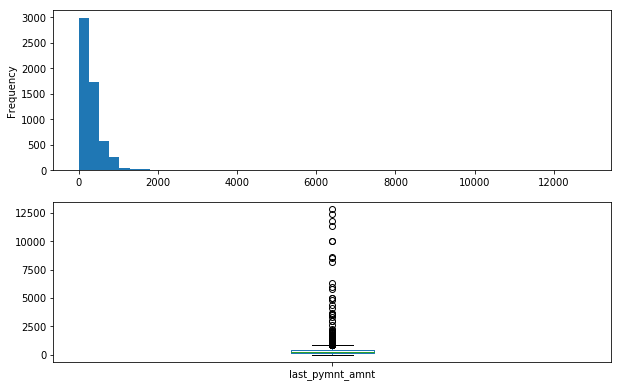

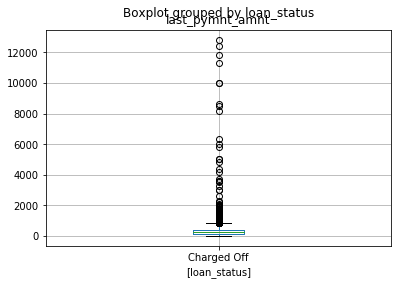

In [480]:
checkNullPerForColumns('last_pymnt_amnt')
totalChargedOffSub = lending_club_ChargedOff['last_pymnt_amnt'].shape[0]
positiveLastPaymnt = len(lending_club_ChargedOff[lending_club_ChargedOff['last_pymnt_amnt'] > 0])
print("Total Number of Subscriber Records: ==>", totalChargedOffSub)
print("Total Unique Counts of the Records: ==>", len(lending_club_ChargedOff['last_pymnt_amnt'].unique()))
print("Total Number of +ve Late Payment, ChargedOff Subscriber: ==>",positiveLastPaymnt)

do_analysis(lending_club_ChargedOff, 'last_pymnt_amnt')

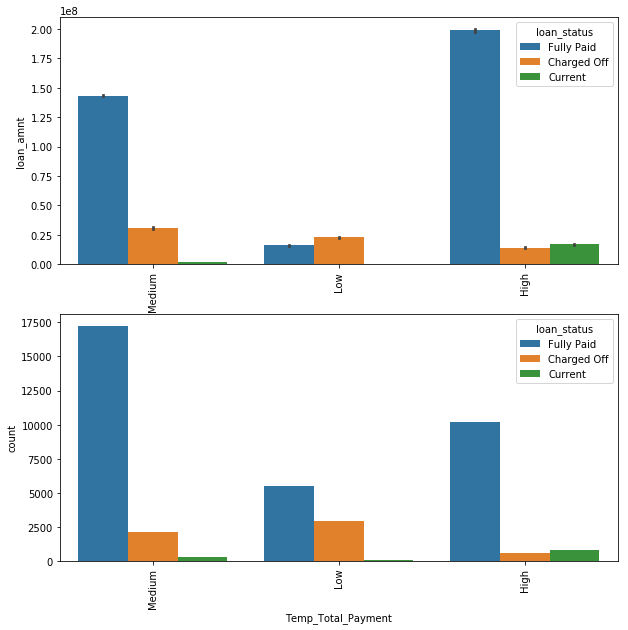

In [481]:
def splitLatePayment(x):
    if x <= 5000:
        return "Low"
    elif x <= 15000:
        return "Medium"
    else:
        return "High"
lending_club_master['Temp_Total_Payment'] = lending_club_master['total_pymnt'].apply(splitTotalPayment)
pltUniVariableAnalysis('Temp_Total_Payment', lending_club_master)
lending_club_master.drop(columns='Temp_Total_Payment', inplace=True)

# Data Cleanup for last_pymnt_amnt

# Insights for last_pymnt_amnt

# Data Analysis for next_pymnt_d

# Data Cleanup for next_pymnt_d

# Insights for next_pymnt_d

# Data Analysis for last_credit_pull_d

# Data Cleanup for last_credit_pull_d

# Insights for last_credit_pull_d

# Data Analysis for collections_12_mths_ex_med

In [482]:
lending_club=lending_club[lending_club.collections_12_mths_ex_med.notnull()]
lending_club['collections_12_mths_ex_med'].isnull().sum()

0

0.0    38137
Name: collections_12_mths_ex_med, dtype: int64
loan_status                 Charged Off  Fully Paid    All
collections_12_mths_ex_med                                
0.0                                5578       32559  38137
All                                5578       32559  38137


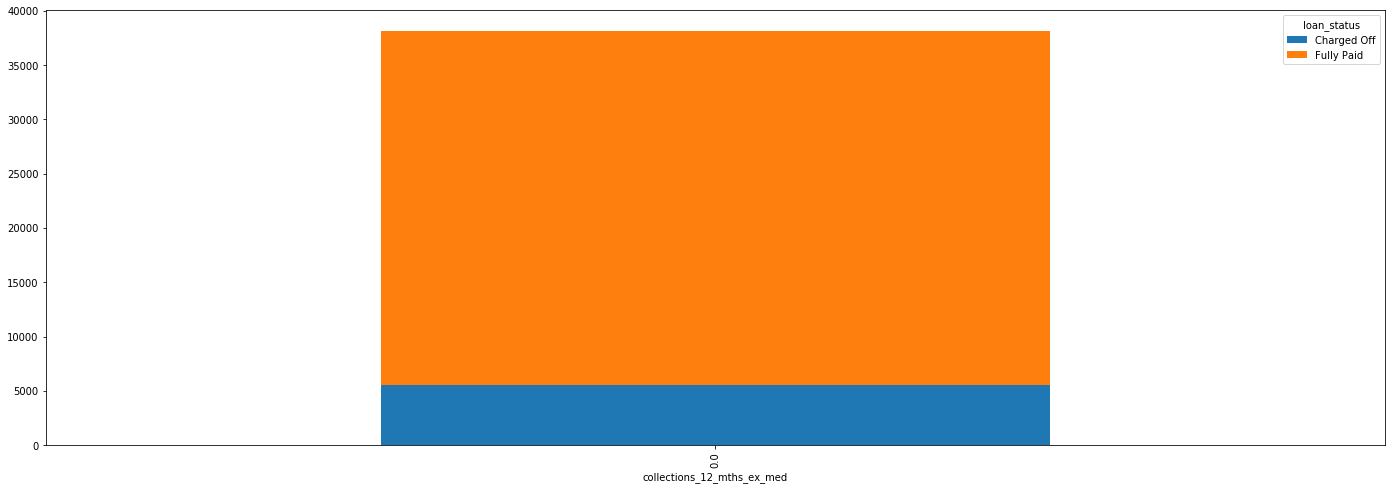

In [483]:
do_analysis_categorical(lending_club,'collections_12_mths_ex_med')
#lending_club['collections_12_mths_ex_med']

# ----------------- SECTION 2 ------------------------
# ----------------- DERIVED COLUMNS -------------

## 1) Income Level

In [484]:
# Creating a function to segment customers based on their income levels
# LOW is less than 30, 000, MID is between 30,000 and 90, 000, HIGH is above 90, 000

def get_income_segment(income):
    if(income < 30000):
        return 'LOW'
    if((income >= 30000) & (income < 90000)):
        return 'MID'
    if(income >= 90000):
        return 'HIGH'

In [485]:
#Segment the customers by income level
lending_club['income_level'] = lending_club.apply(lambda row : get_income_segment(row['annual_inc']), axis=1)

In [486]:
# Segmented Univariate Analysis
pd.pivot_table(lending_club, values = 'policy_code', index = ['income_level'], columns = ['loan_status'], aggfunc = np.sum)

loan_status,Charged Off,Fully Paid
income_level,,
HIGH,839,6790
LOW,700,3033
MID,4039,22736


array([<matplotlib.axes._subplots.AxesSubplot object at 0x113bf48d0>,
      dtype=object)

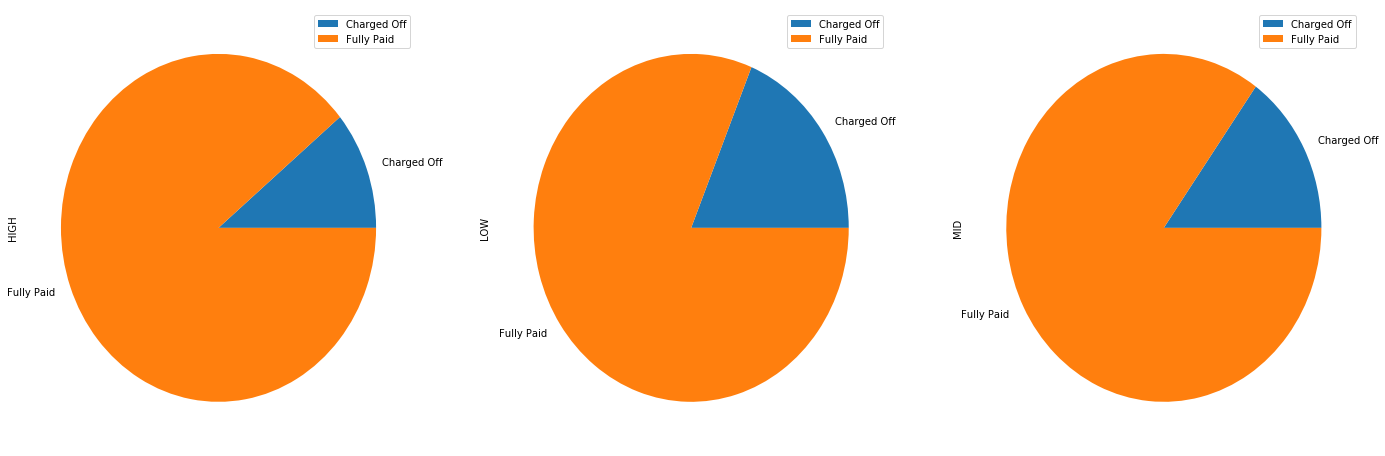

In [487]:
# Segmented Univariate Analysis
pd.pivot_table(lending_club, values = 'policy_code', index = ['loan_status'], columns = ['income_level'], aggfunc = np.sum).plot(kind='pie', subplots=True, figsize=(24, 8))

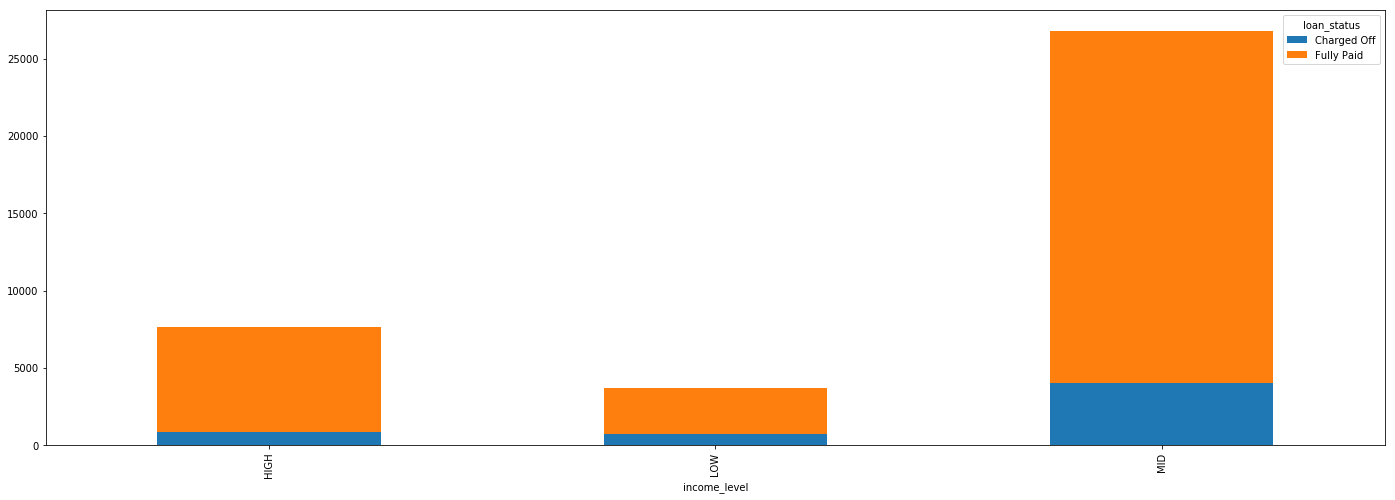

In [488]:
# Segmented Univariate Analysis. todo create barcharts so that all bars are of same height
pd.pivot_table(lending_club, values = 'policy_code', index = ['income_level'], columns = ['loan_status'], aggfunc = np.sum).plot(kind='bar', stacked=True, figsize=(24, 8))

## INSIGHT : This pivot table gives the percentage of charged off (defaults) in each income segment.
10% : HIGH Income segment have 841/(6808 + 218 + 841) <br/>
14% : MID Income Segment have 4043 / (4043 + 789 + 22758)<br/>
18% : LOW Income Segment has 700 / (700 + 56 + 3043)<br/>

### This shows that the Loan default increases in the lower income segment.

### What is the distribution of loan amount in the lower income segment when customer defaults

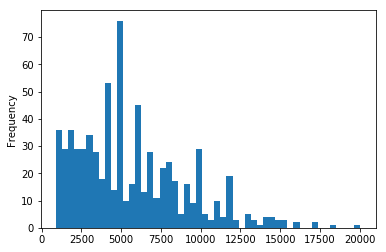

In [489]:
lending_club.loc[(lending_club['income_level'] == 'LOW') & (lending_club['loan_status'] == 'Charged Off')]['loan_amnt'].plot(kind='hist', bins=50)

## 2) Loan Amount Funded Amount difference

In [490]:
# I also want to analyse if the people who ask more, but get less. 
# Is there is corelation between this difference and chargeoff

lending_club['asking_lending_difference'] = lending_club['loan_amnt'] - lending_club['funded_amnt']

count    38137.000000
mean       259.481606
std       1386.222204
min          0.000000
0%           0.000000
10%          0.000000
20%          0.000000
30.0%        0.000000
40%          0.000000
50%          0.000000
60.0%        0.000000
70%          0.000000
80%          0.000000
90%          0.000000
100%     21025.000000
max      21025.000000
Name: asking_lending_difference, dtype: float64
Number of null values for the column asking_lending_difference : 0


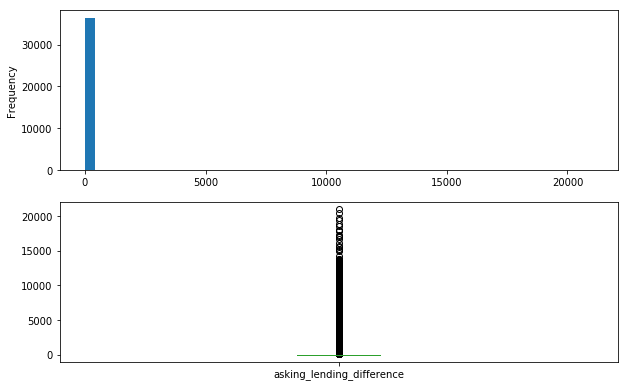

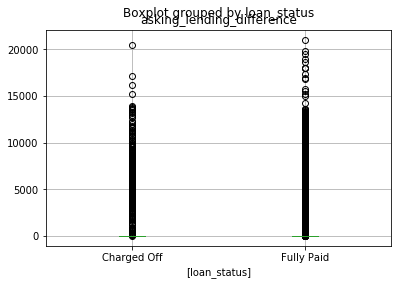

In [491]:
do_analysis(lending_club, 'asking_lending_difference')

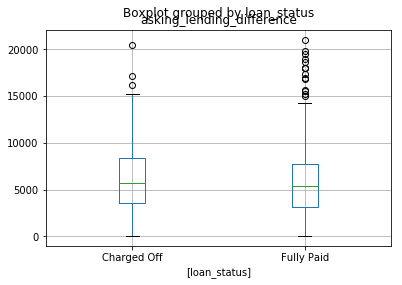

In [492]:
# Where asking_lending_difference is greater than 0
lending_club[['asking_lending_difference', 'loan_status']].loc[lending_club['asking_lending_difference'] > 0].boxplot(by='loan_status')

# Insight
The charged off loans had asked for a higher amount but got lower loan amount.

In [493]:
run_t_test(lending_club, 'asking_lending_difference')

Ttest_indResult(statistic=5.107858716838854, pvalue=3.2739700637100517e-07)


# ----------- SECTION 3 ------------
# ----------- Bi Variate Analysis ------------

## 1) Multivariate analysis using a dendrogram

In [494]:
corr = lending_club[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 
                     'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'annual_inc', 'revol_bal','last_pymnt_amnt',
                     'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','dti']].corr()

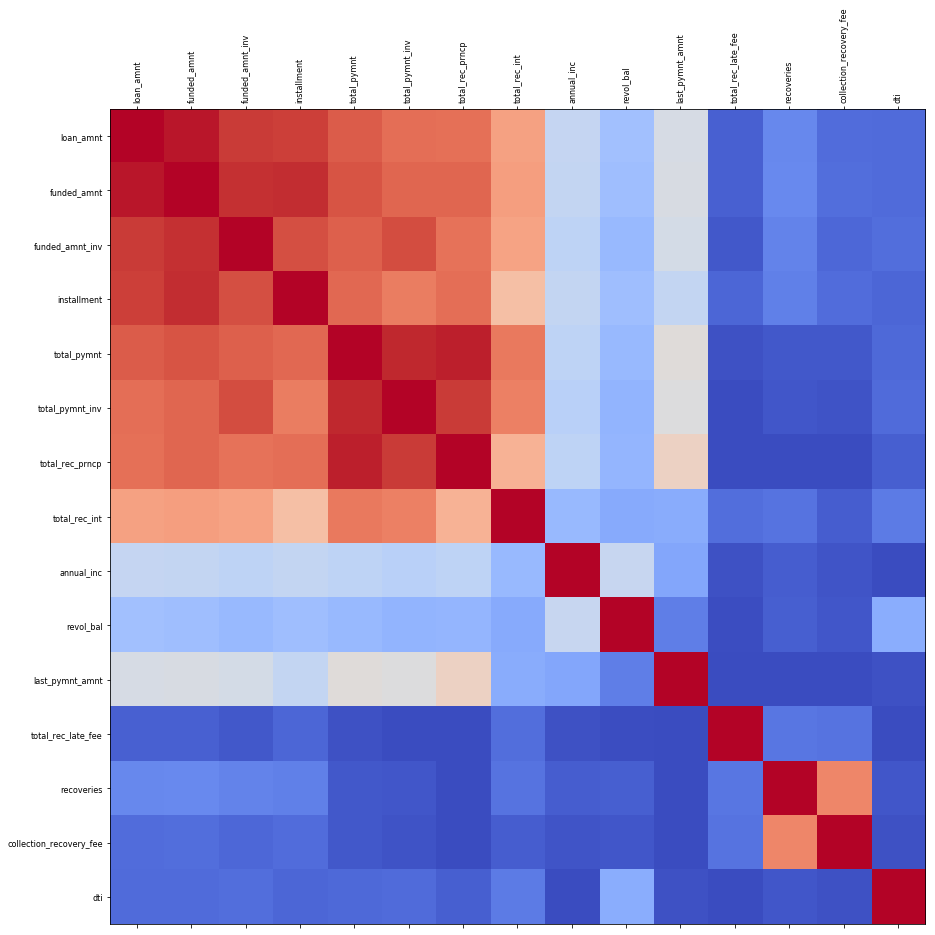

In [495]:
fig, ax = plt.subplots(figsize=(15,15))
ax.matshow(corr, cmap=cm.get_cmap('coolwarm'), vmin=0, vmax=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8);


In [496]:
Z = linkage(corr, 'average')

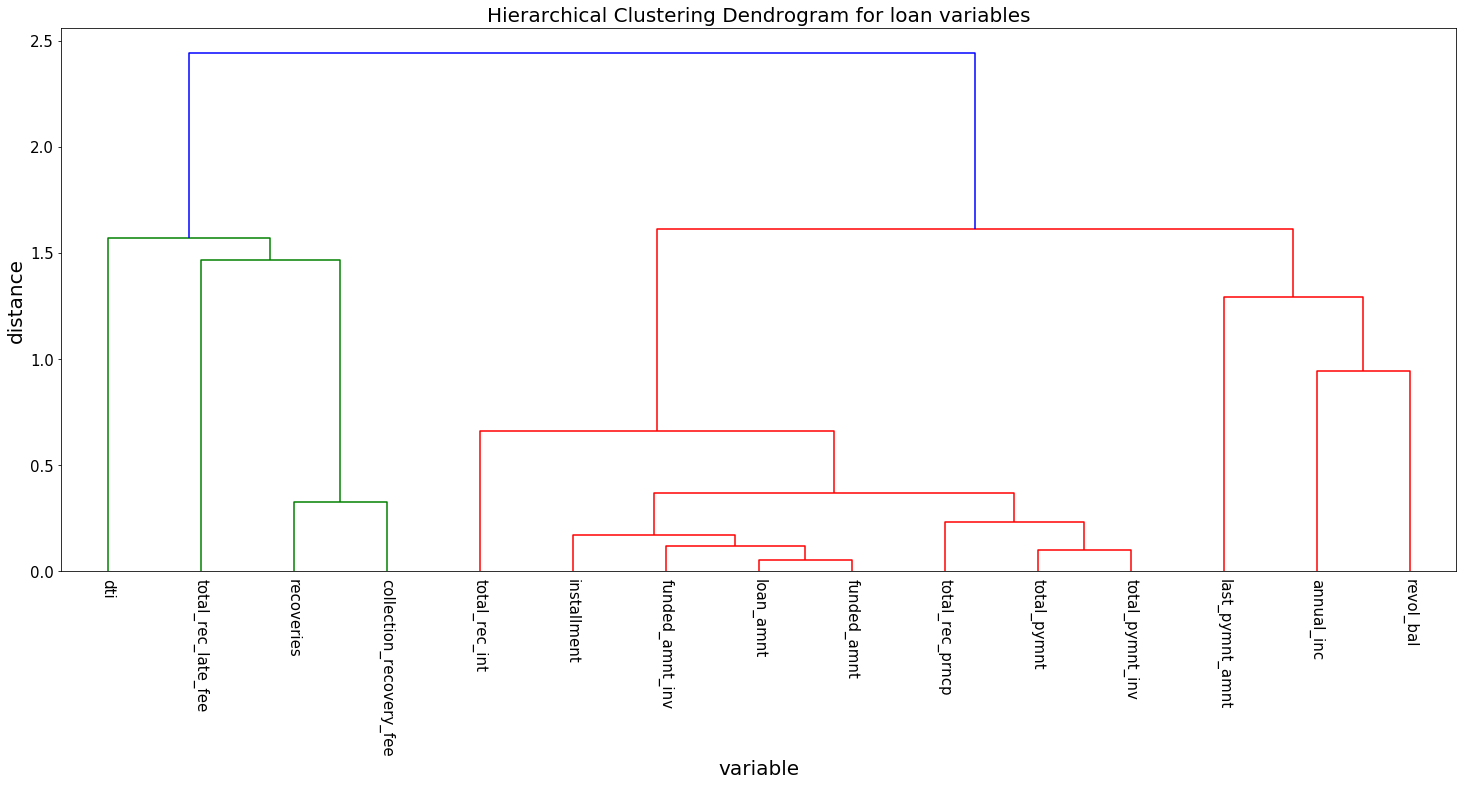

In [497]:
plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram for loan variables', fontsize=labelsize)
plt.xlabel('variable', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = corr.columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
#plt.savefig('img/dendogram_'+index+'.png')
plt.show()

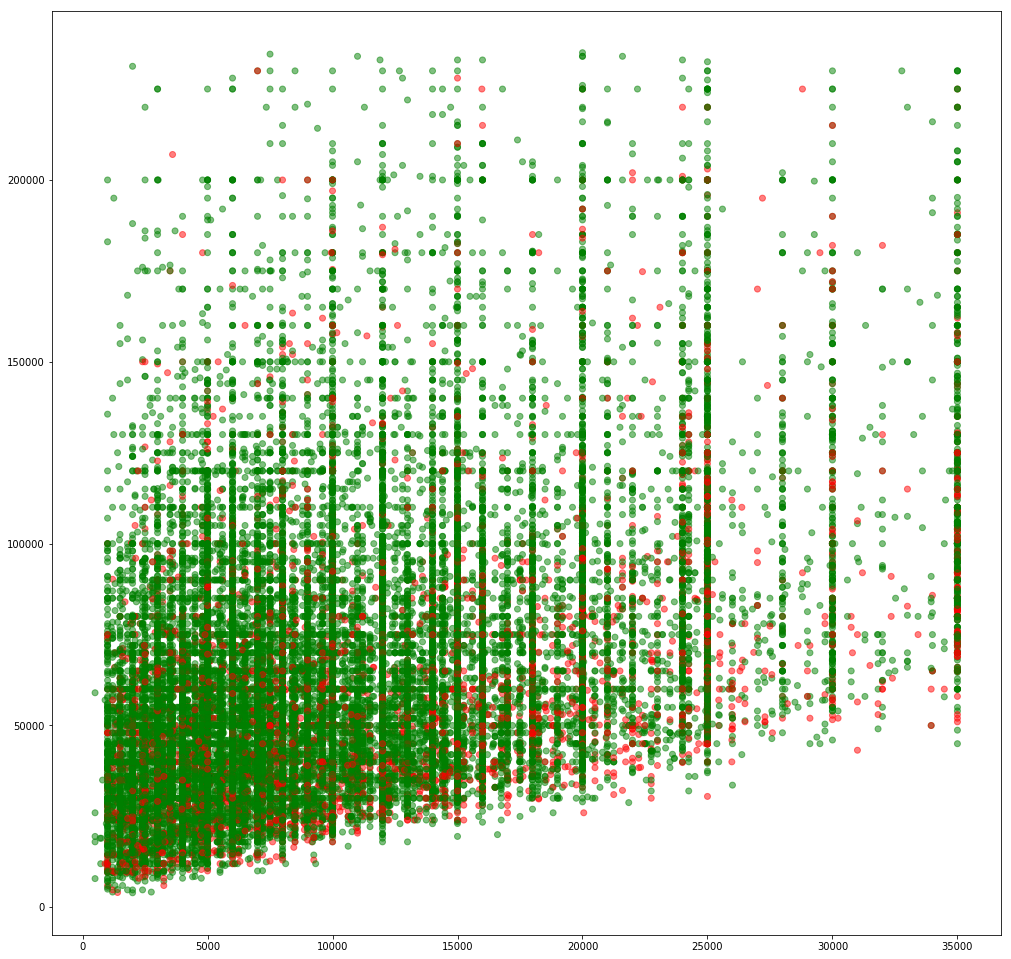

In [498]:

fig, ax = plt.subplots(figsize=(17,17))

colours = {'Fully Paid':'green', 'Charged Off':'red', 'Current':'blue'}
ax.scatter(lending_club['loan_amnt'], lending_club['annual_inc'], c=lending_club['loan_status'].apply(lambda x: colours[x]), alpha=0.5)

## Insight
Plot to see if there is a co-relation between the loan amount and annual income, and see if there are any clusters <br>
 of defaults. We see that the loan amount is co-related to annual income, however there is no pattern or clusters of <br>
defaults <br>
At lower income levels - below 10000 USD and higher loan amounts - above 15, 000 USD, there seems to be a concentration of defaults.

# Sub Section - Hrudaya

### Analyse ```Grade, SubGrade, Interest Rate``` with Respect to Other Columns (BiVariate)

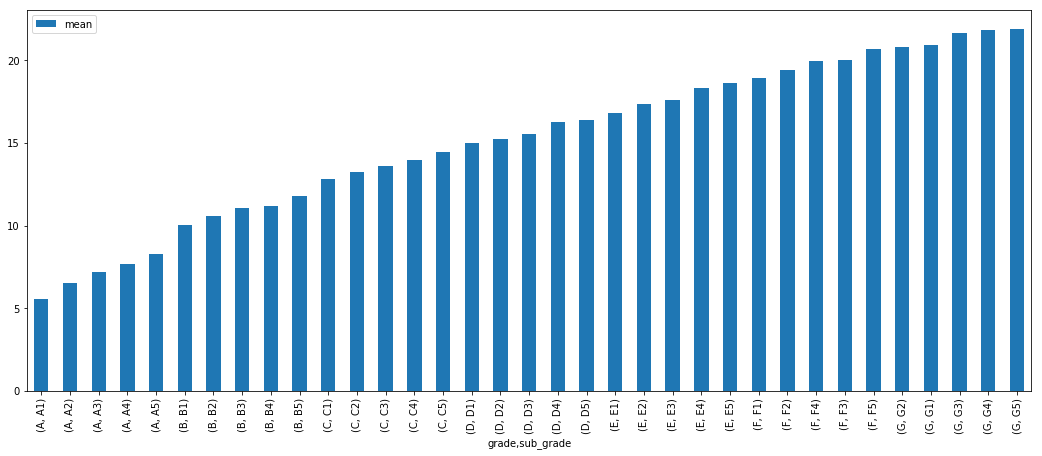

In [499]:
#Grade, Sub-Grade to Loan Percentage, As per the Graph, Upper Grade is Having Higher Interest Rate
lending_club.groupby(['grade', 'sub_grade'])['int_rate'].agg(['mean']).sort_values(by='mean').plot(kind='bar', figsize=(18,7))

#### Derived Columns (Grade_SubGragde, LateFeePrecent)

In [500]:
#Create a Single Column by Merging grade and subgrade
lending_club['grade_subgrade'] = lending_club['grade'] + "_" + lending_club['sub_grade']
lending_club['grade_subgrade'].nunique()

35

In [501]:
#Create a Derive Column for the LateFeePercent With Respect to TotalPayment
lending_club['lateFeePrecent'] = round((lending_club['total_rec_late_fee']/lending_club['total_pymnt'])*100,2)

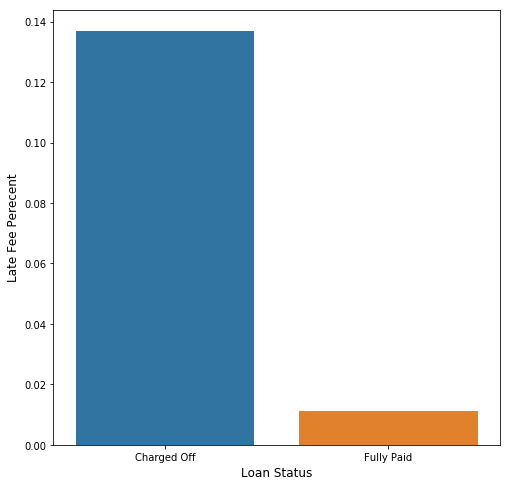

In [502]:
X1 = lending_club.groupby('loan_status'). lateFeePrecent.agg(['mean']).reset_index()
plt.figure(figsize=(8,8))
sns.barplot(x = 'loan_status', y='mean', data = X1)
plt.xlabel('Loan Status', fontsize = 12)
plt.ylabel('Late Fee Perecent', fontsize = 12)
plt.show()

## `Insight`
* Late Fee Percentage is Higer for ChargedOff Subscriber than FullyPaid Subcriber

In [503]:
#Get Average Interest Rate Based on grade and Subgrade
group_subgroup_intRate = pd.DataFrame(lending_club.groupby('grade_subgrade').int_rate.agg(['mean']).reset_index())
#Merge the new Column AvgIntRate to the main Frame Based on grade-subgrade
lending_club = pd.merge(lending_club,group_subgroup_intRate, how = 'inner', on = ['grade_subgrade']).rename(columns = {'mean':'avgIntRate'})

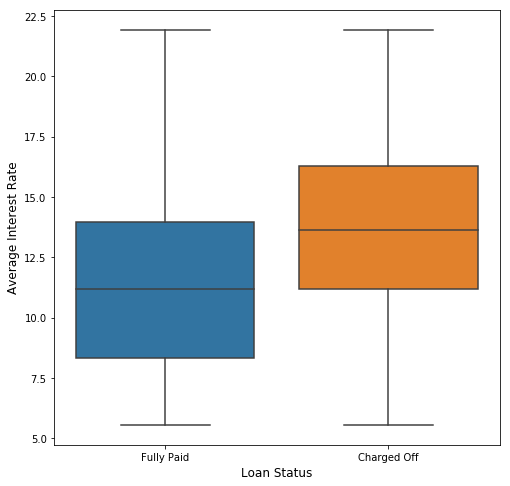

In [504]:
plt.figure(figsize=(8,8))
sns.boxplot('loan_status', 'avgIntRate', data = lending_club)
plt.xlabel('Loan Status', fontsize = 12)
plt.ylabel('Average Interest Rate', fontsize = 12)
plt.show()

## `Insight`
* Average Ineterest Rate Based on Group/SubGroup is Higher for Charged Off Subscriber than Fully Paid Subscriber

In [505]:
#Grade impact on LateFee Precentage
X1 = createDF_LateFeePrecent_Categories('grade')
X1.head()

loan_status,grade,Charged Off,Fully Paid,LateFeePercent_diff
0,A,0.164210,0.006156,0.158054
2,C,0.166059,0.015965,0.150094
1,B,0.137014,0.011589,0.125425
3,D,0.134229,0.014664,0.119565
6,G,0.095354,0.015579,0.079775


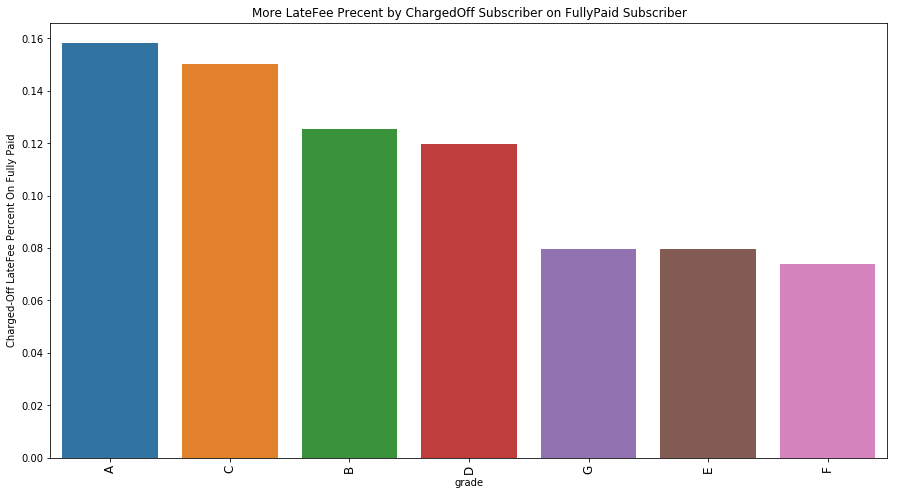

In [506]:
#Plot Grade impact on LateFee Precentage based on LoanCategory
pltLateFeePercentOnCategies('grade',X1)

## `Insight`
* In following top 3 category(grade) where ChargedOff Suscriber give more latefee than Fullypaid subscriber
    * A 
    * C 
    * B 

In [507]:
#grade_subgrade impact on LateFee Precentage
X1 = createDF_LateFeePrecent_Categories('grade_subgrade')
X1.head()

loan_status,grade_subgrade,Charged Off,Fully Paid,LateFeePercent_diff
6,B_B2,0.287511,0.010919,0.276592
3,A_A4,0.221798,0.006780,0.215018
14,C_C5,0.232560,0.019527,0.213034
0,A_A1,0.207000,0.006921,0.200079
13,C_C4,0.202153,0.017454,0.184699


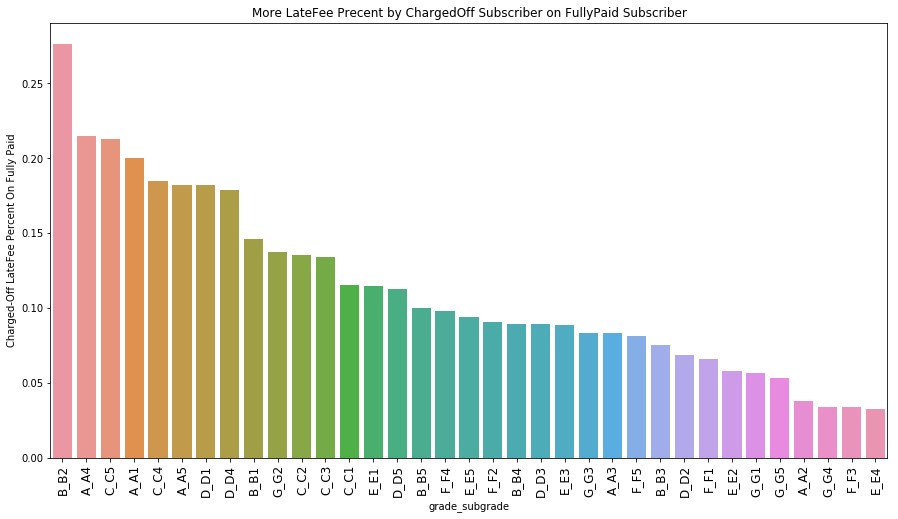

In [508]:
#Plot grade_subgrade impact on LateFee Precentage based on LoanCategory
pltLateFeePercentOnCategies('grade_subgrade',X1)

## `Insight`
* In following top 3 category(grade_subgrade) where ChargedOff Suscriber give more latefee than Fullypaid subscriber
    * B_B2 
    * A_A4 
    * C_C5 

### Analyse ```"Home Ownership"``` with respect to Other Columns (BiVariate)

In [509]:
#home_ownership impact on LateFee Precentage
X1 = createDF_LateFeePrecent_Categories('home_ownership')
X1.head()

loan_status,home_ownership,Charged Off,Fully Paid,LateFeePercent_diff
2,OWN,0.183790,0.018029,0.165761
3,RENT,0.151760,0.014262,0.137499
0,MORTGAGE,0.110798,0.006947,0.103851
1,OTHER,0.034444,0.020513,0.013932


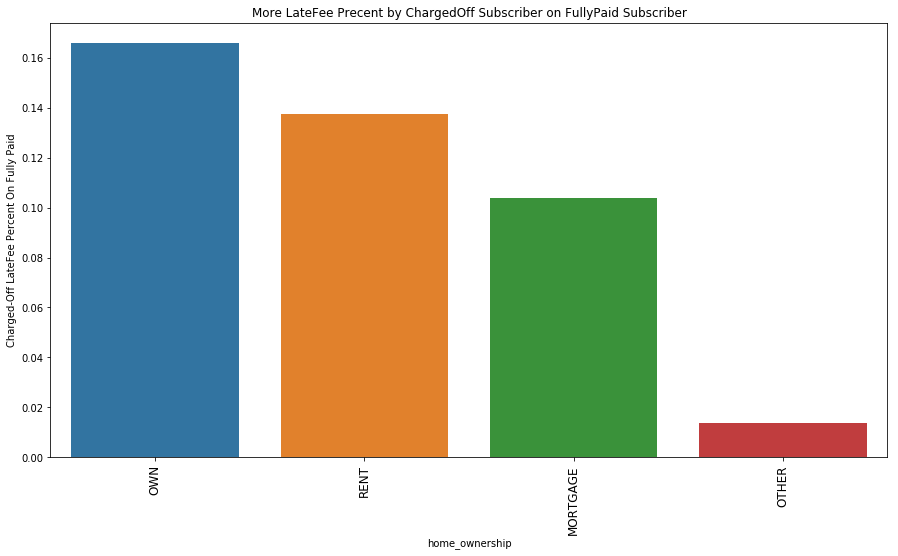

In [510]:
#Plot home_ownership impact on LateFee Precentage based on LoanCategory
pltLateFeePercentOnCategies('home_ownership',X1)

#### Insight
* In following top 3 category (Home_Ownership) where ChargedOff Suscriber give more latefee than Fullypaid subscriber
    * Own
    * Rent
    * Mortgage

### Analyse ```"purpose"``` with respect to Other Columns (BiVariate)

In [511]:
#purpose impact on LateFee Precentage
X1 = createDF_LateFeePrecent_Categories('purpose')
X1.head()

loan_status,purpose,Charged Off,Fully Paid,LateFeePercent_diff
12,vacation,0.258113,0.028687,0.229426
9,other,0.247818,0.021148,0.226671
7,medical,0.239623,0.020000,0.219623
6,major_purchase,0.225727,0.010618,0.215109
11,small_business,0.173582,0.012879,0.160703


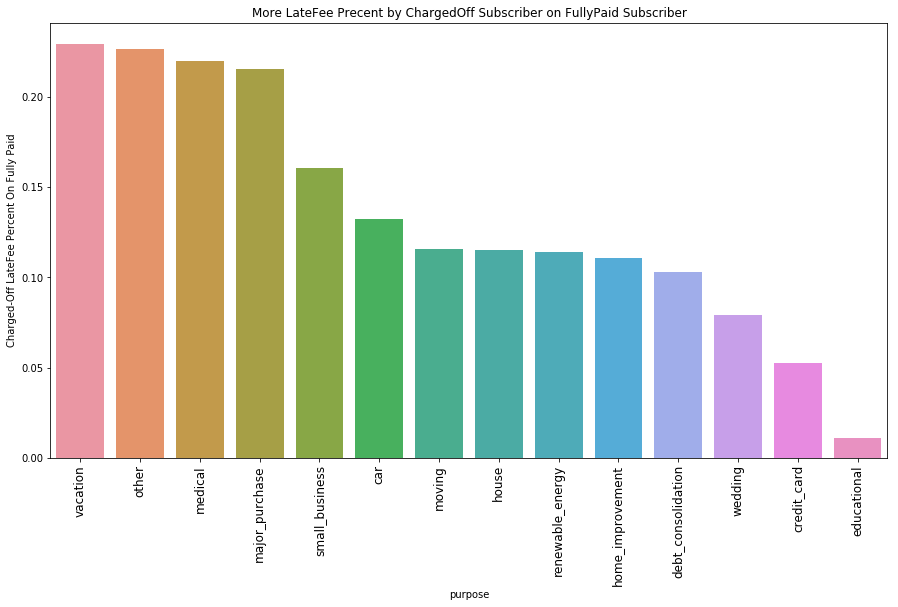

In [512]:
#Plot purpose impact on LateFee Precentage based on LoanCategory
pltLateFeePercentOnCategies('purpose',X1)

## `Insight`
* In following top 3 category(Purpose) where ChargedOff Suscriber give more latefee than Fullypaid subscriber
  * Vacation
  * Other
  * Medical

### Analyse ```"addr_state"``` with respect to Other Columns (BiVariate)

In [513]:
#addr_state impact on LateFee Precentage
X1 = createDF_LateFeePrecent_Categories('addr_state')
X1.head()

loan_status,addr_state,Charged Off,Fully Paid,LateFeePercent_diff
31,NM,0.36800,0.004295,0.363705
35,OK,0.30600,0.009959,0.296041
41,TN,0.39000,0.109333,0.280667
8,DE,0.27250,0.013267,0.259233
27,NC,0.26115,0.005780,0.255370


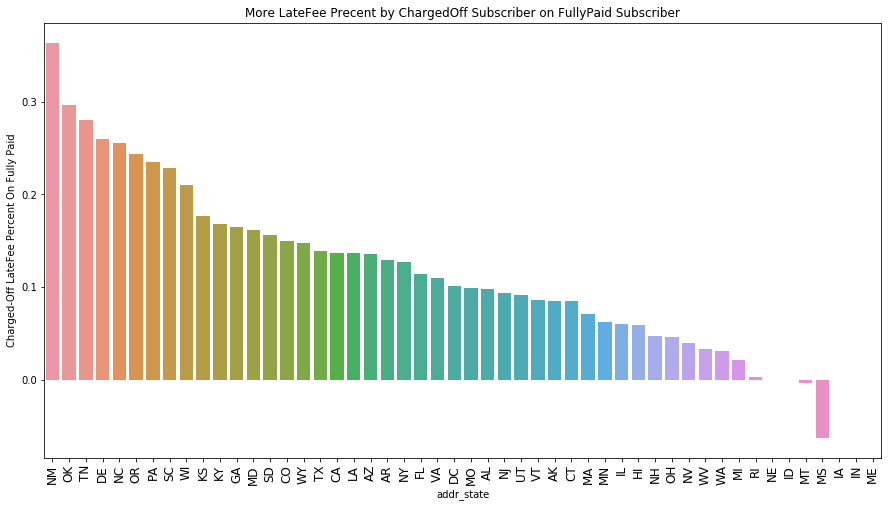

In [514]:
#Plot purpose impact on LateFee Precentage based on LoanCategory
pltLateFeePercentOnCategies('addr_state',X1)

## `Insight`
* In following top 3 category(addr_state) where ChargedOff Suscriber give more latefee than Fullypaid subscriber
    * NM
    * OK
    * TN

### Analyse ```"inq_last_6mths"``` with respect to Other Columns (BiVariate)

In [515]:
#inq_last_6mths impact on LateFee Precentage
X1 = createDF_LateFeePrecent_Categories('inq_last_6mths')
X1.head()

loan_status,inq_last_6mths,Charged Off,Fully Paid,LateFeePercent_diff
7,7,0.312000,0.053478,0.258522
3,3,0.193931,0.015517,0.178414
0,0,0.137266,0.009927,0.127339
5,5,0.123704,0.005789,0.117914
1,1,0.124882,0.012517,0.112365


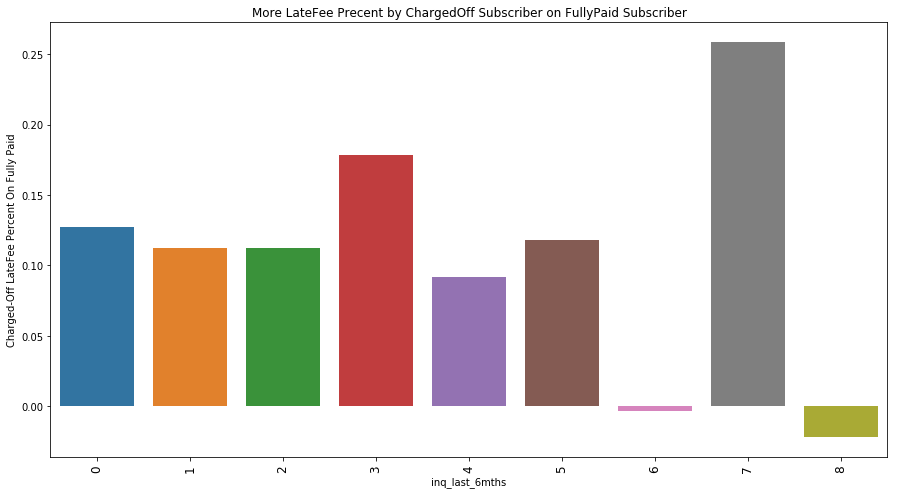

In [516]:
#Plot purpose impact on LateFee Precentage based on LoanCategory
pltLateFeePercentOnCategies('inq_last_6mths',X1)

## `Insight`
* In following top 3 category(inq_last_6mths) where ChargedOff Suscriber give more latefee than Fullypaid subscriber
     * 7 (Last 6 Month Inquary Count)
     * 3 (Last 6 Month Inquary Count)
     * 0 (Last 6 Month Inquary Count)

### Analyse ```"pub_rec"``` with respect to Other Columns (BiVariate)

In [517]:
#pub_rec impact on LateFee Precentage
X1 = createDF_LateFeePrecent_Categories('pub_rec')
X1.head()

loan_status,pub_rec,Charged Off,Fully Paid,LateFeePercent_diff
0,0,0.142327,0.011198,0.131129
1,1,0.079268,0.013628,0.065640
2,2,0.028000,0.015405,0.012595
3,3,NaN,0.041429,NaN
4,4,NaN,0.000000,NaN


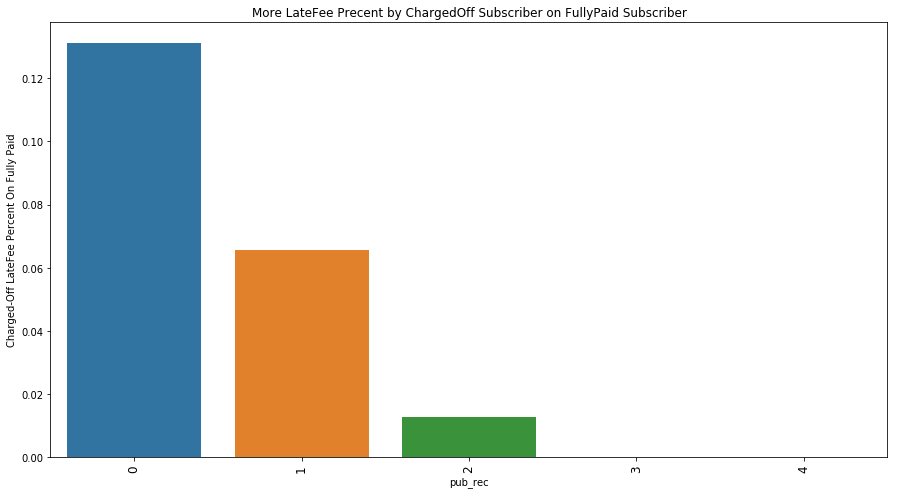

In [518]:
#Plot purpose impact on LateFee Precentage based on LoanCategory
pltLateFeePercentOnCategies('pub_rec',X1)

## `Insight`
* In following top 3 category(pub_rec) where ChargedOff Suscriber give more latefee than Fullypaid subscriber
    * 0 (Pub Rec)
    * 1 (Pub Rec)
    * 2 (Pub Rec)
* Charged-Off Susbcriber information are not present mostly in pub-rec

* Based on Total Loan Amount, CA and NY are city for which Fullypaid and ChargedOff Subscribers are more

# Sub Section - Aditya

# Sub Section - Divya

## Logistic Regression for Stastical Inference

In [519]:
def convert_loan_status_to_binary(loan_status):
    if(loan_status == 'Charged Off'):
        return 1;
    if(loan_status == 'Fully Paid'):
        return 0
    
lending_club['loan_status_binary'] = lending_club['loan_status'].apply(lambda x:convert_loan_status_to_binary(x))


In [528]:
lreg = smf.logit(formula ='loan_status_binary ~ annual_inc + loan_amnt +C(income_level) + dti + revol_bal + int_rate + C(verification_status) + delinq_2yrs + revol_util + pub_rec_bankruptcies + funded_amnt + C(term) + C(purpose) + open_acc', data = lending_club).fit()


Optimization terminated successfully.
         Current function value: 0.380406
         Iterations 6


In [529]:
print(lreg.summary())

                           Logit Regression Results                           
Dep. Variable:     loan_status_binary   No. Observations:                37503
Model:                          Logit   Df Residuals:                    37474
Method:                           MLE   Df Model:                           28
Date:                Sat, 28 Jul 2018   Pseudo R-squ.:                 0.08404
Time:                        18:34:26   Log-Likelihood:                -14266.
converged:                       True   LL-Null:                       -15575.
                                        LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -3.5793      0.152    -23.601      0.000      -3.877      -3.282
C(income_level)[T.LOW]                

In [530]:
print("odds ratios of each variable")
print(np.exp(lreg.params))

odds ratios of each variable
Intercept                                    0.027894
C(income_level)[T.LOW]                       1.265037
C(income_level)[T.MID]                       1.057112
C(verification_status)[T.Source Verified]    1.003172
C(verification_status)[T.Verified]           1.036787
C(term)[T. 60 months]                        1.880163
C(purpose)[T.credit_card]                    0.917294
C(purpose)[T.debt_consolidation]             1.186130
C(purpose)[T.educational]                    1.765804
C(purpose)[T.home_improvement]               1.225460
C(purpose)[T.house]                          1.470480
C(purpose)[T.major_purchase]                 1.030137
C(purpose)[T.medical]                        1.524435
C(purpose)[T.moving]                         1.547021
C(purpose)[T.other]                          1.575394
C(purpose)[T.renewable_energy]               1.897524
C(purpose)[T.small_business]                 2.710473
C(purpose)[T.vacation]                       1.528998

In [531]:
print("lower and upper confidence intervals")
print(lreg.conf_int())

lower and upper confidence intervals
                                                  0         1
Intercept                                 -3.876596 -3.282095
C(income_level)[T.LOW]                     0.034588  0.435616
C(income_level)[T.MID]                    -0.080945  0.192027
C(verification_status)[T.Source Verified] -0.074480  0.080815
C(verification_status)[T.Verified]        -0.042524  0.114777
C(term)[T. 60 months]                      0.556614  0.706103
C(purpose)[T.credit_card]                 -0.284584  0.111930
C(purpose)[T.debt_consolidation]          -0.009297  0.350688
C(purpose)[T.educational]                  0.217022  0.920191
C(purpose)[T.home_improvement]            -0.005994  0.412626
C(purpose)[T.house]                        0.042774  0.728405
C(purpose)[T.major_purchase]              -0.194394  0.253777
C(purpose)[T.medical]                      0.145707  0.697540
C(purpose)[T.moving]                       0.144808  0.727854
C(purpose)[T.other]              